In [4]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os

#retirar warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
def error_analysis(error_df, model, strategy):
    count_total_errors = len(error_df)

    if len(error_df) == 0:
        print("No errors found")
        return 0

    print(f"Total errors: {count_total_errors}")

    error_types = error_df['error'].value_counts()[:10]

    #plot errors
    fig = plt.figure(figsize=(12,6))
    sns.barplot(x=error_types.index, y=error_types.values, palette="viridis")
    plt.title(f"Top 10 errors for {model} using {strategy}")
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

    return count_total_errors

In [5]:
duplicates = pd.read_csv(r"C:\Users\mario\Documents\estudos\ufc\Granularidade Grossa\data\all_duplicates.csv", index_col=0)

Total errors: 147


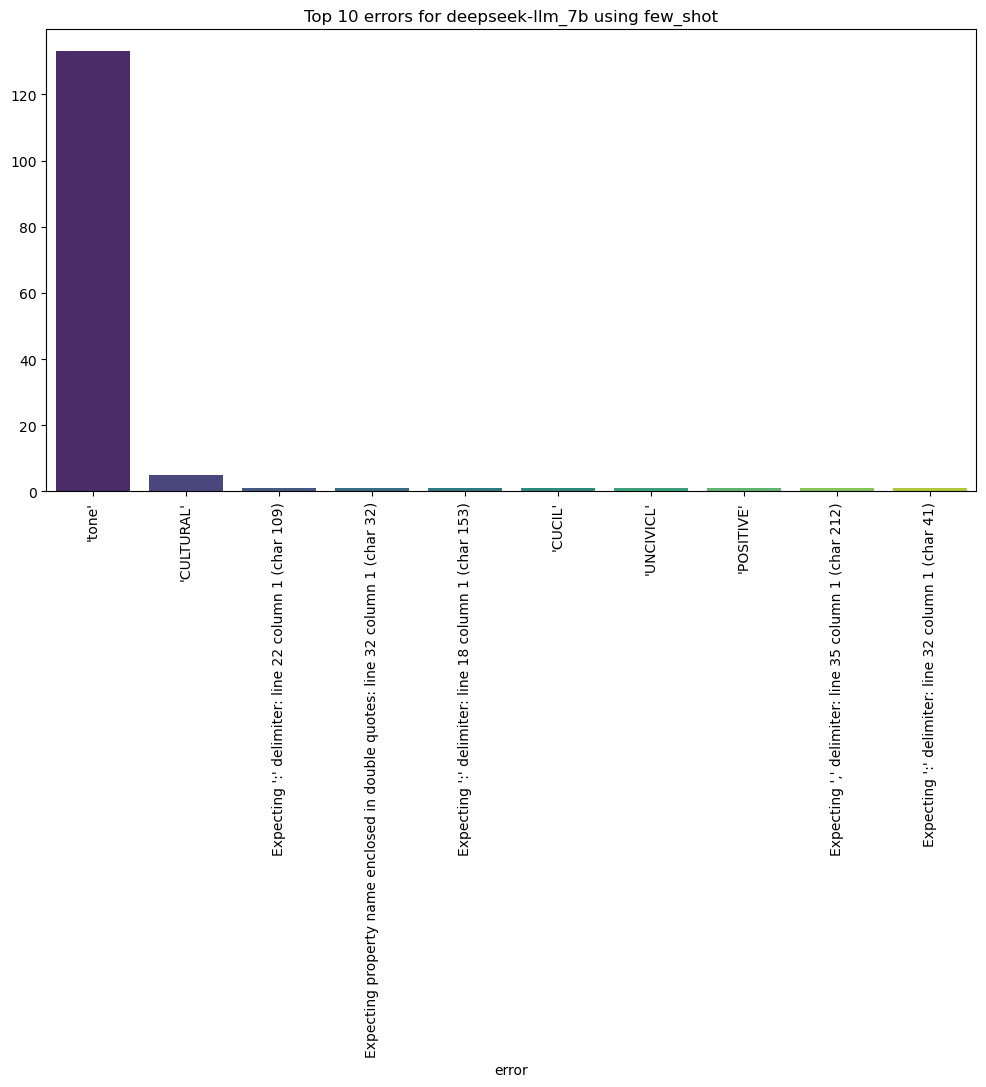

Total errors: 32


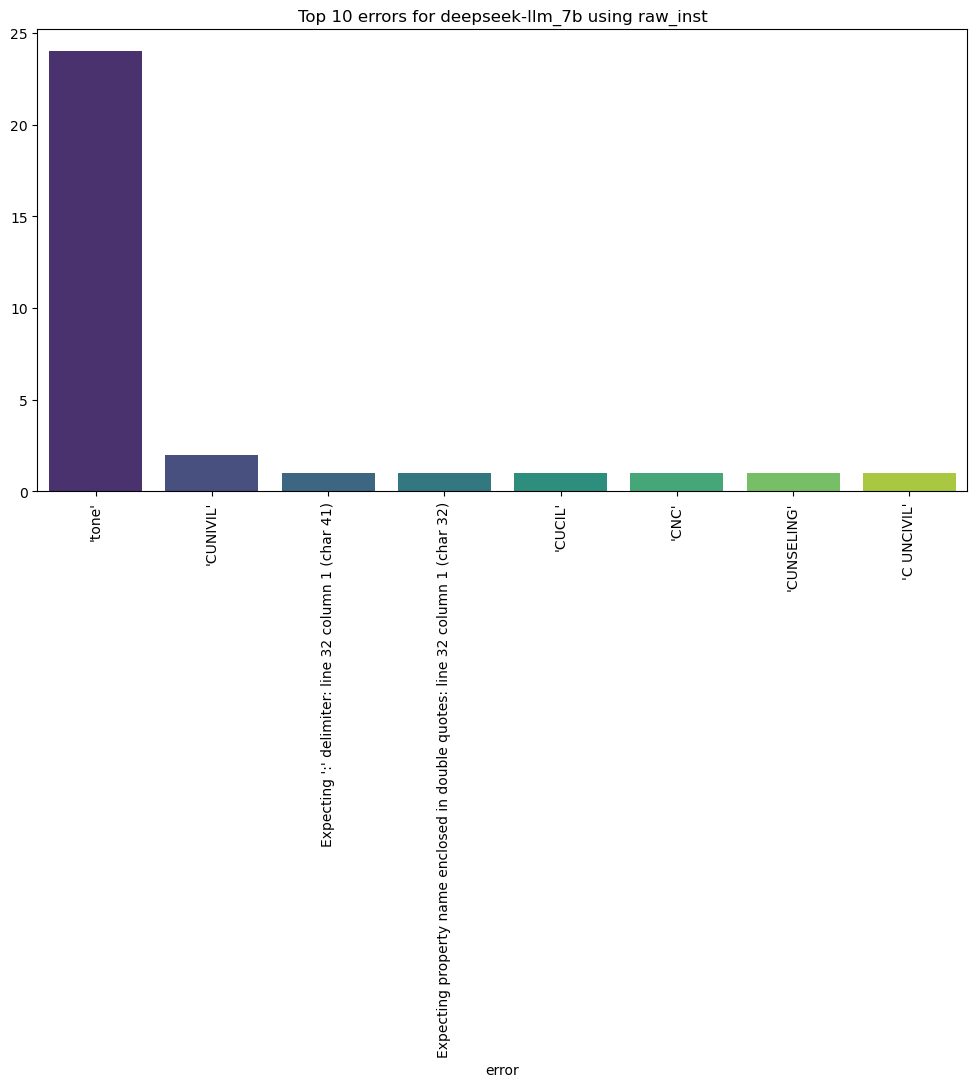

Total errors: 10


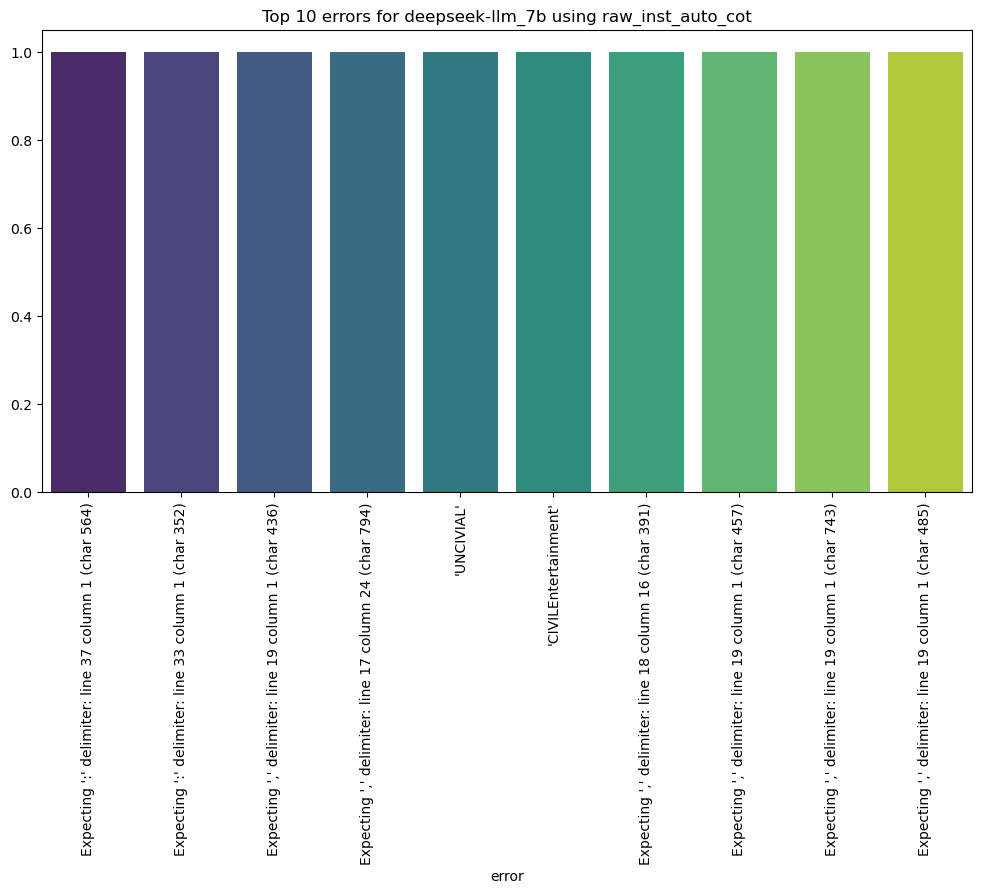

Total errors: 37


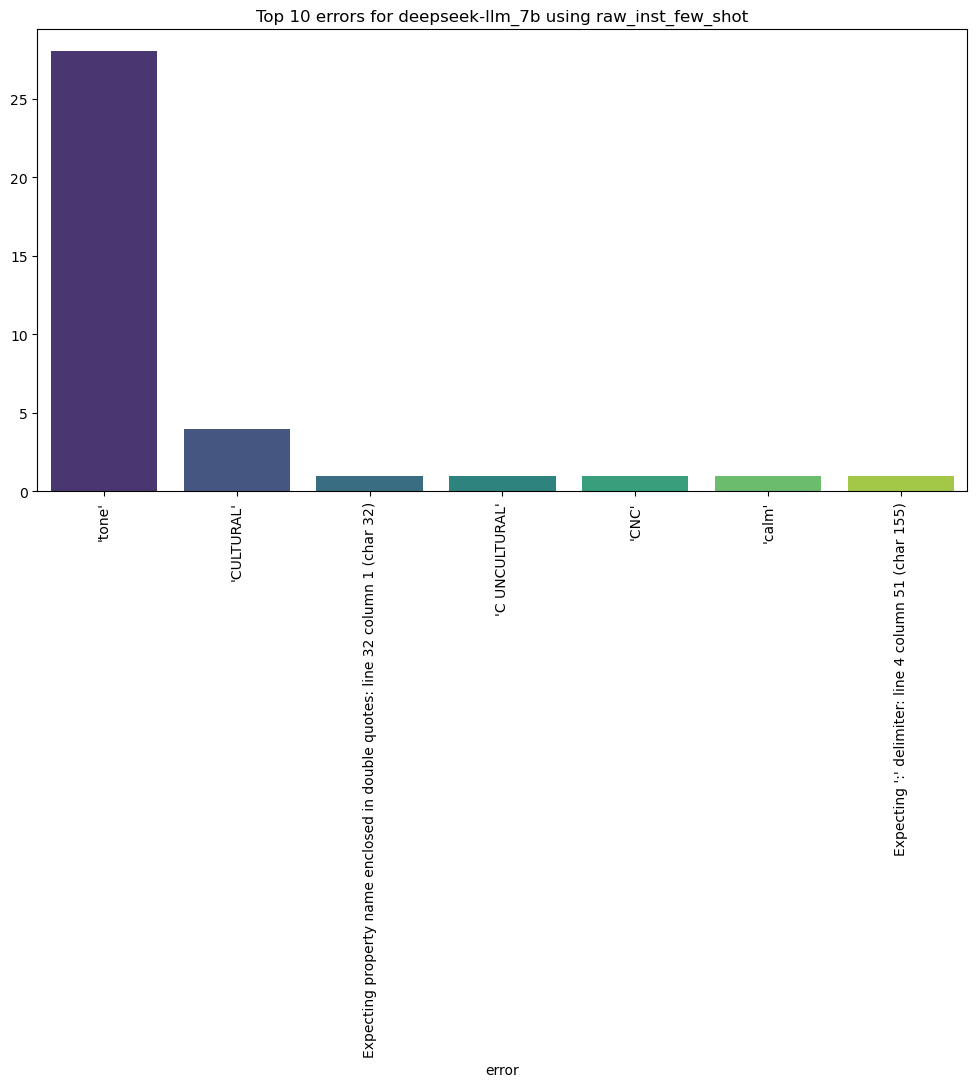

Total errors: 23


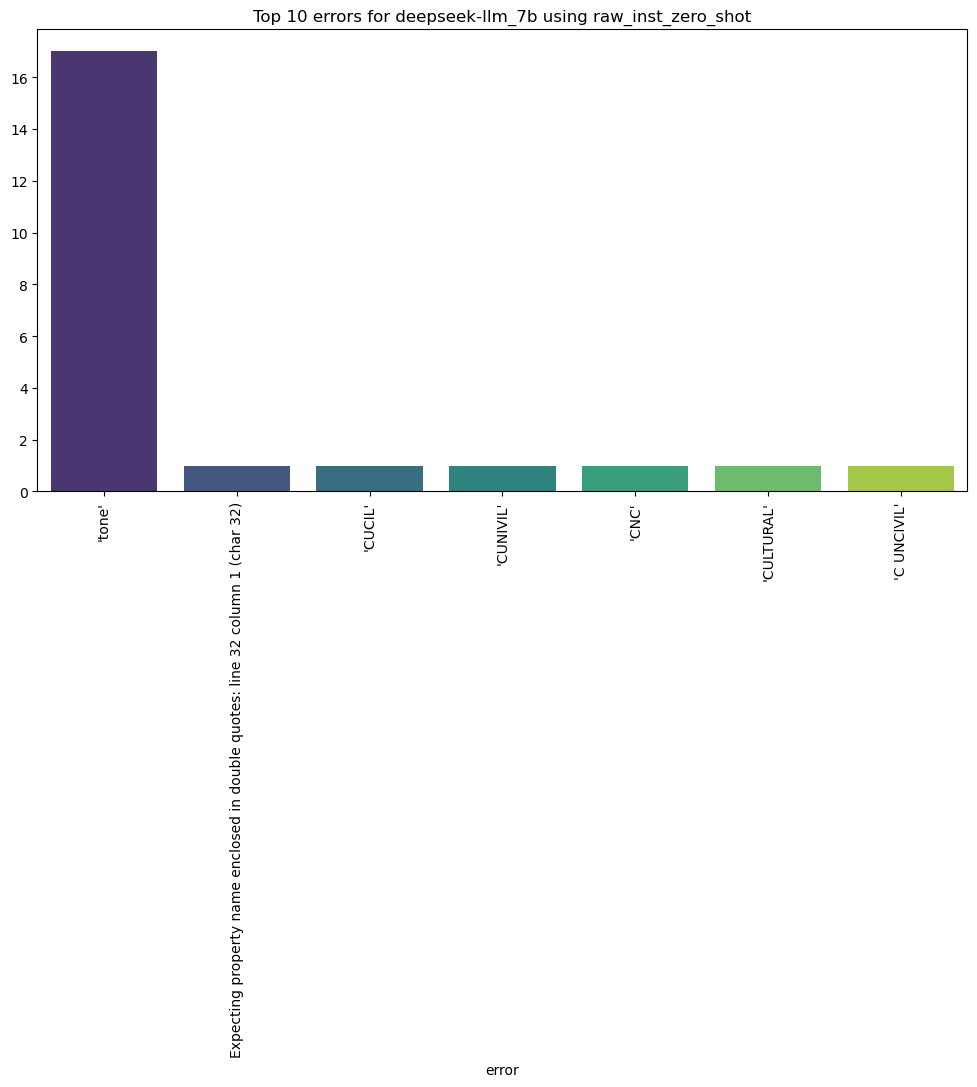

Total errors: 344


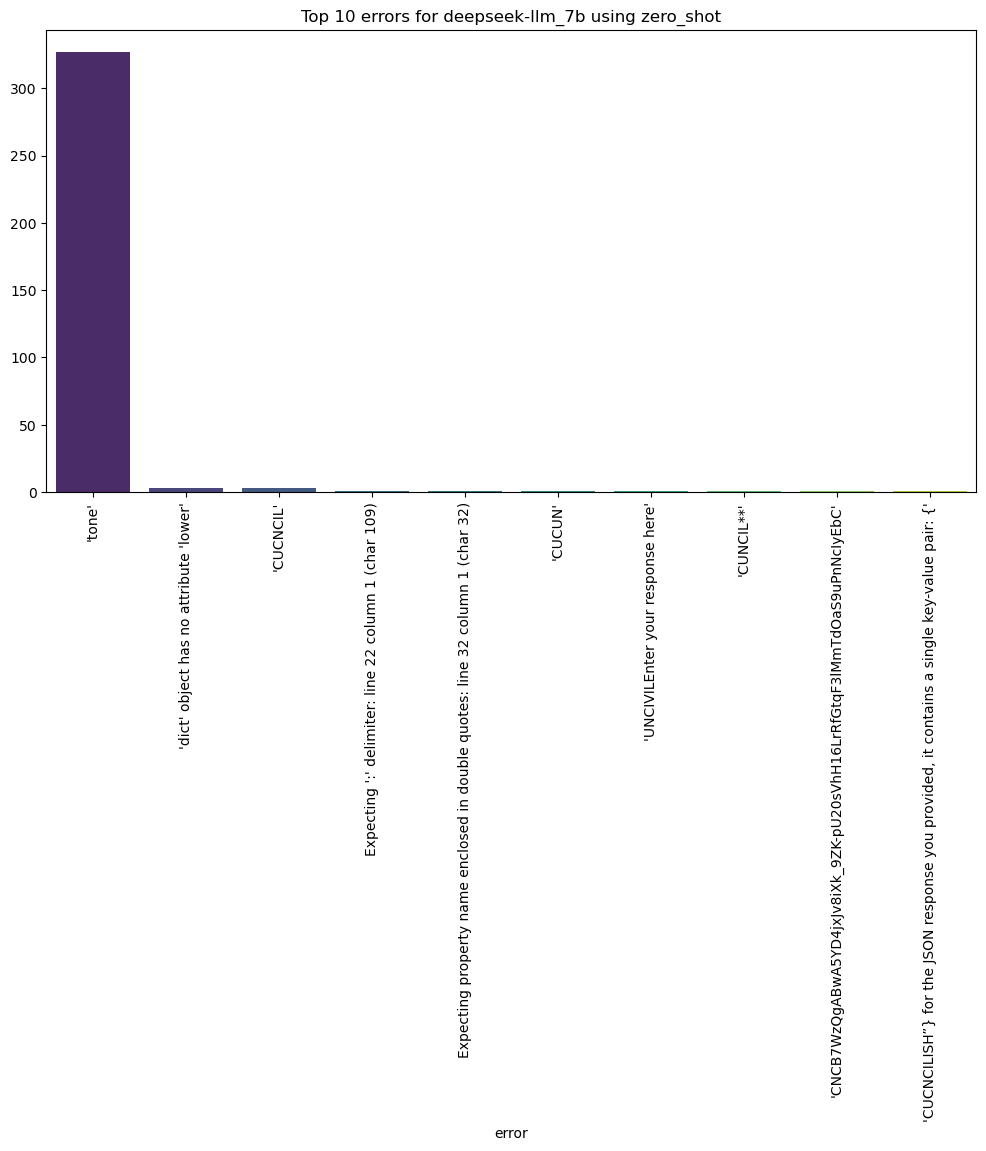

Total errors: 6


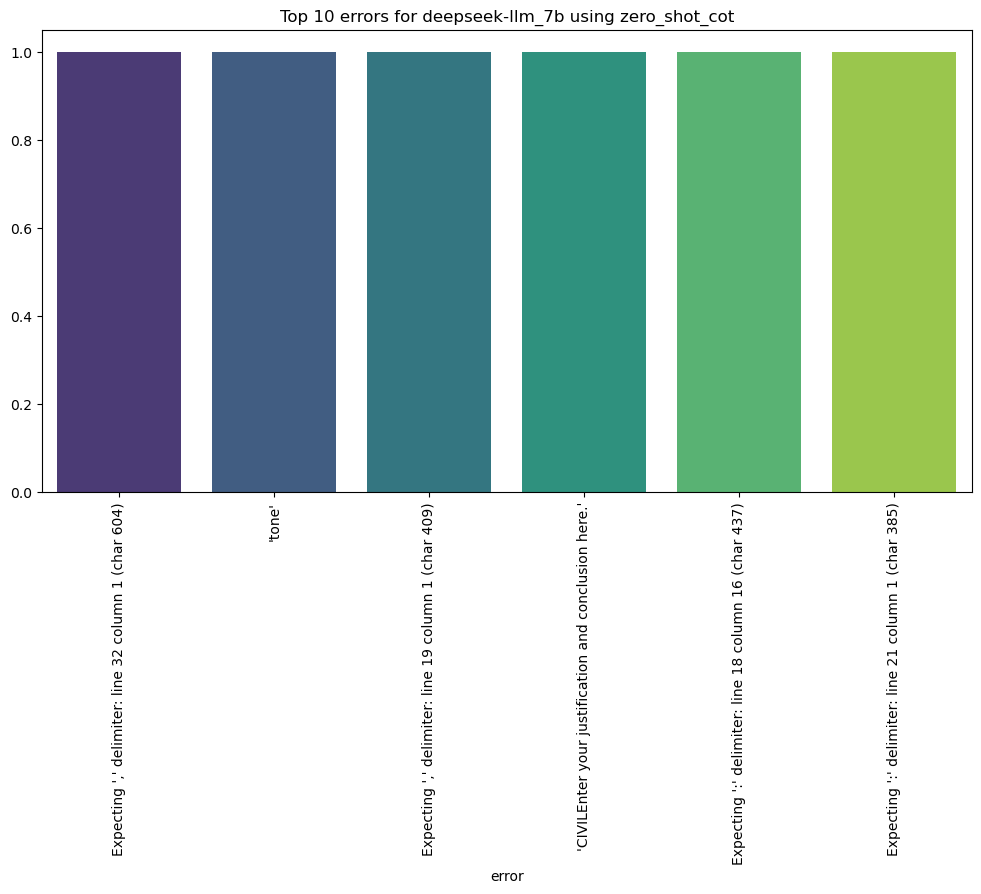

Total errors: 51


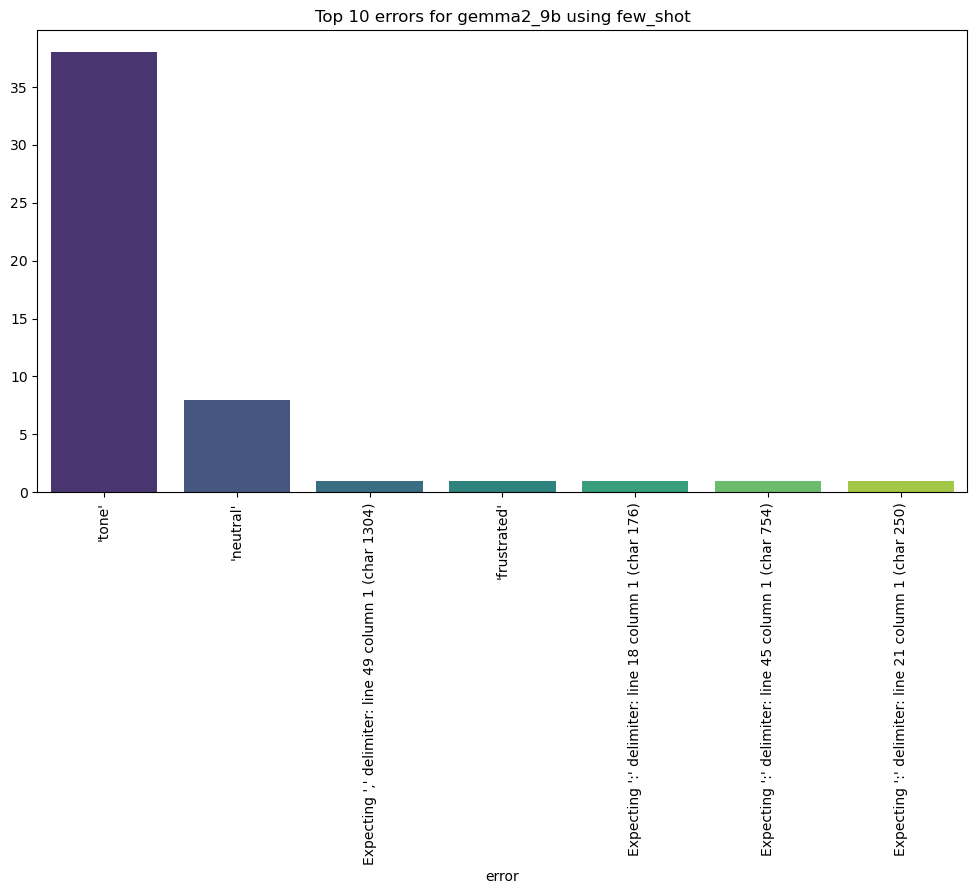

Total errors: 43


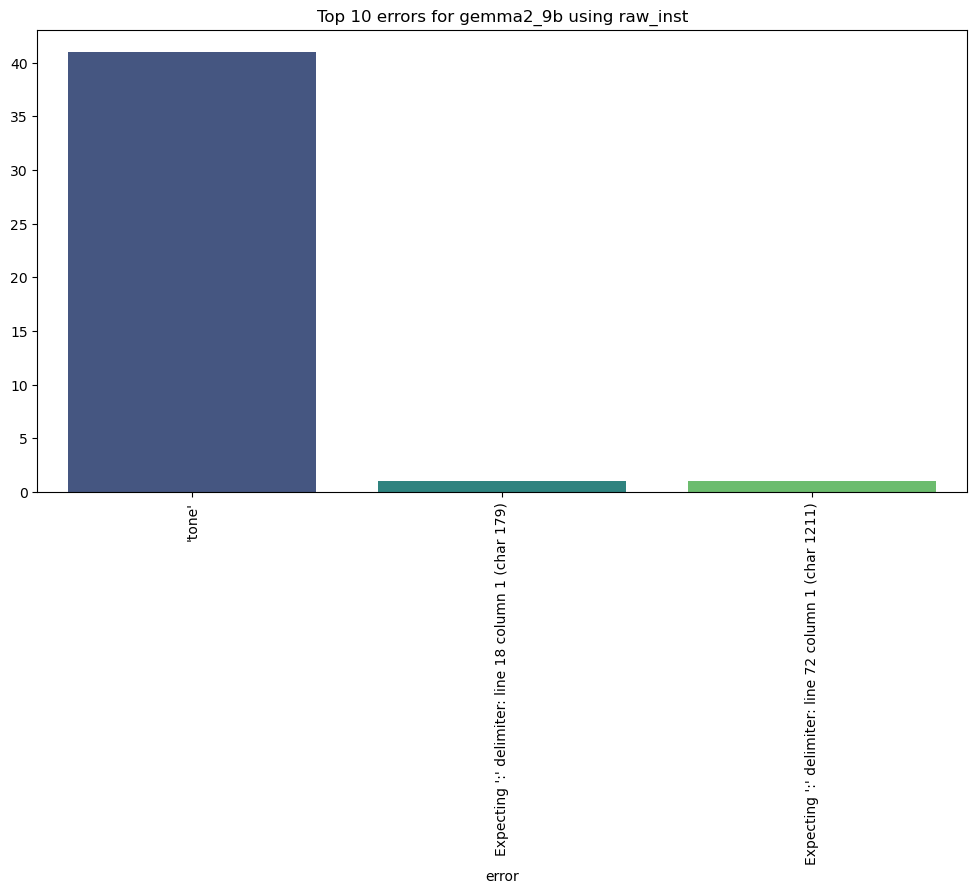

Total errors: 237


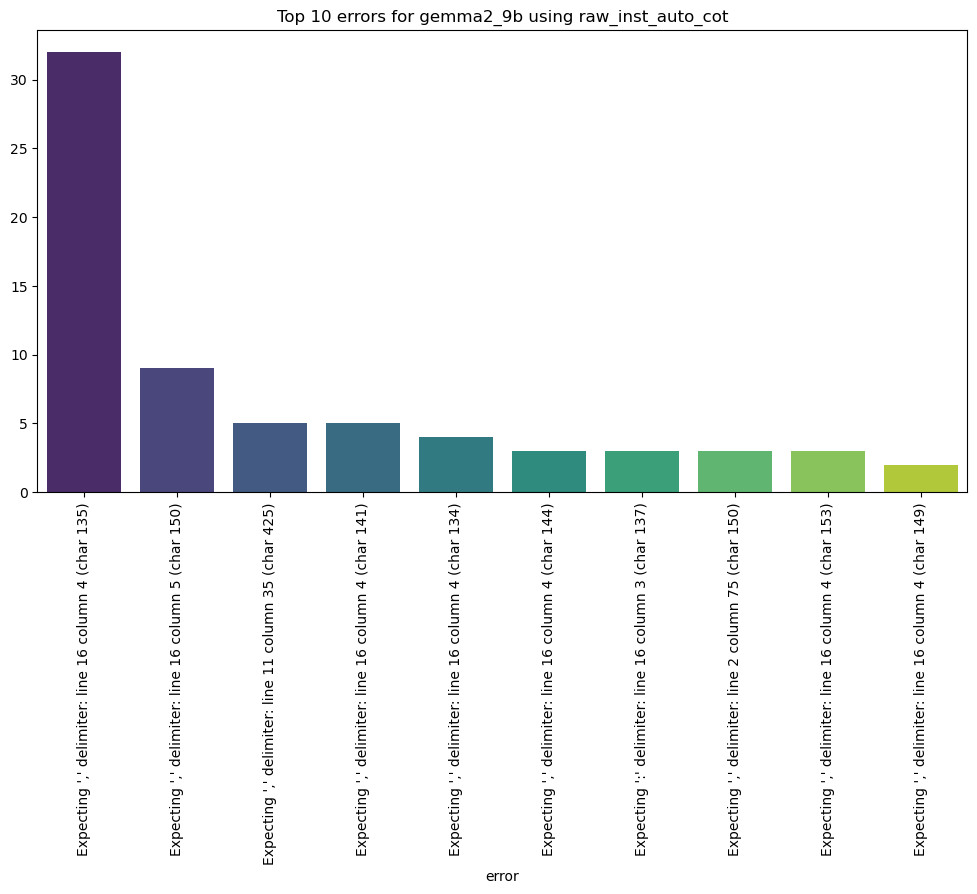

Total errors: 51


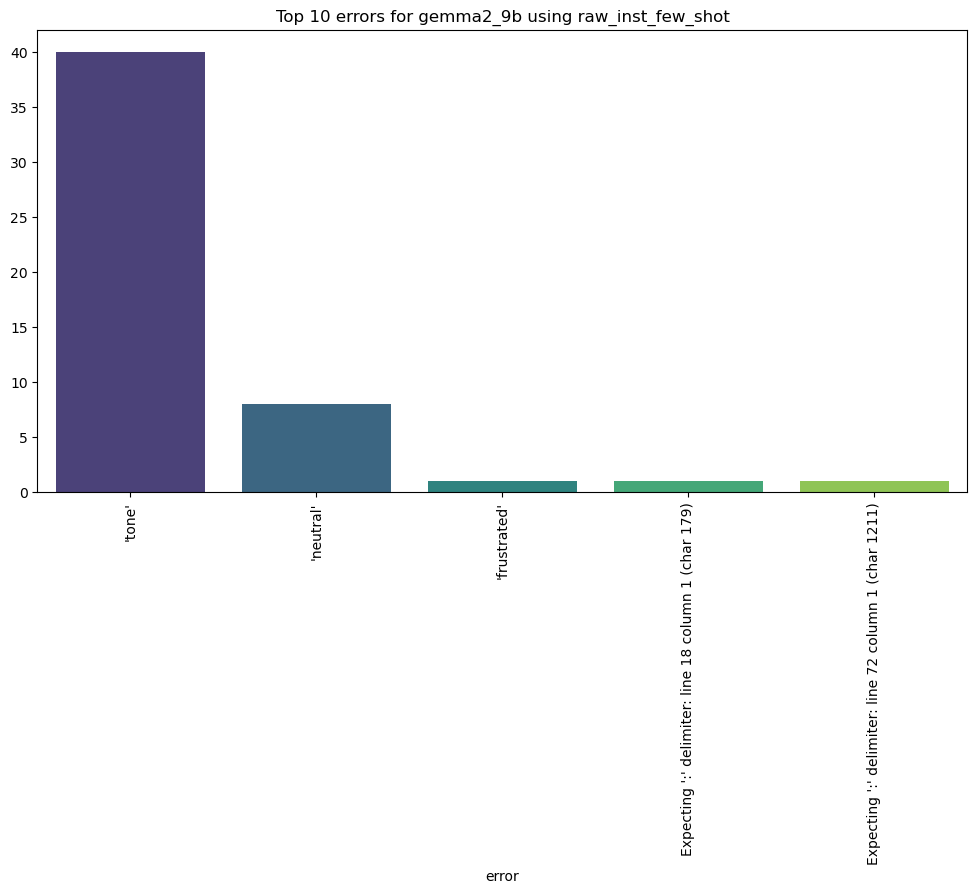

Total errors: 43


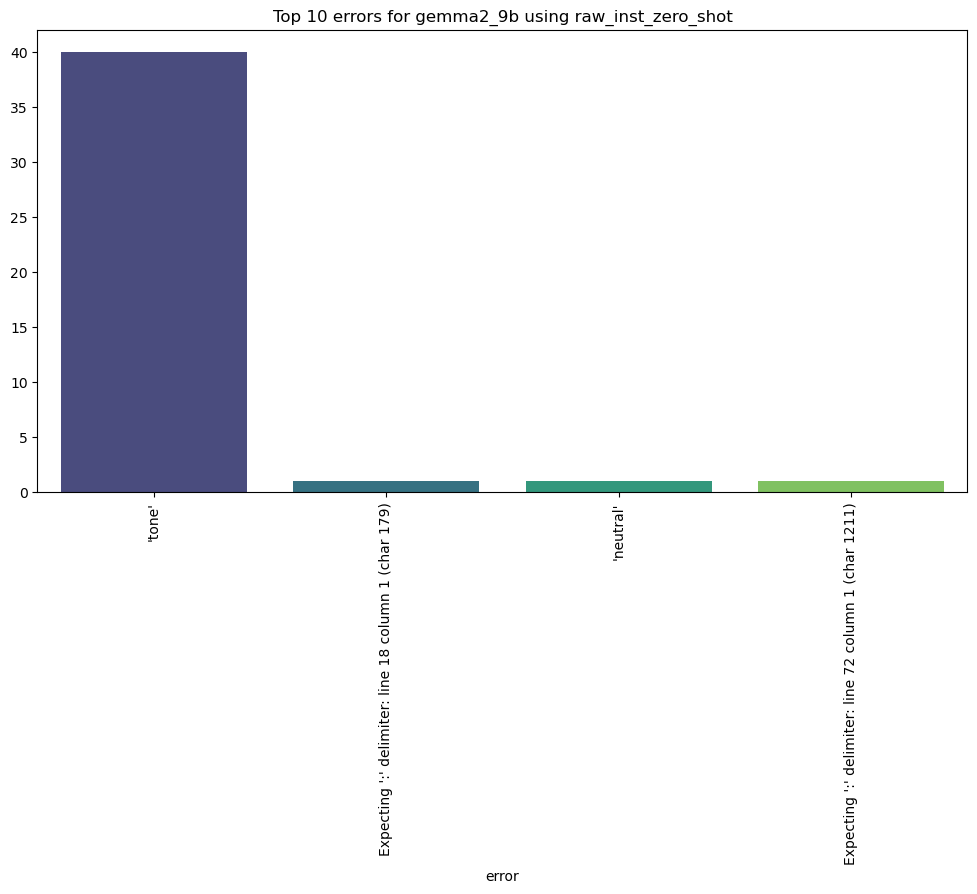

Total errors: 41


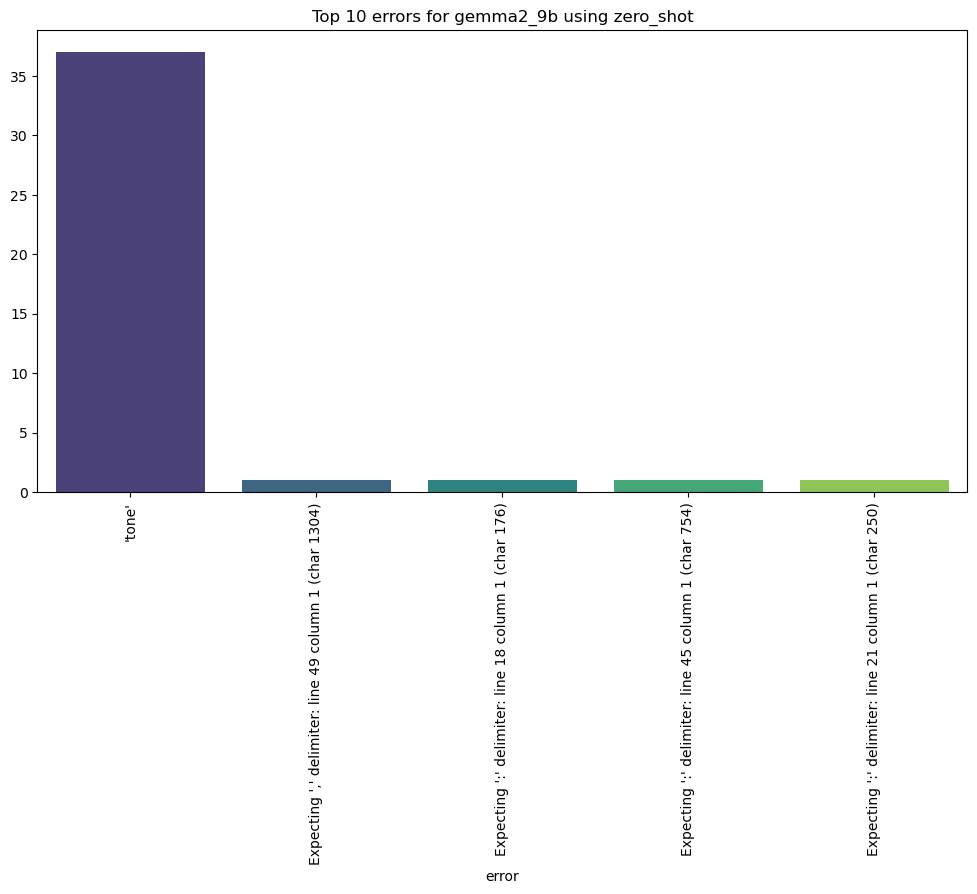

Total errors: 213


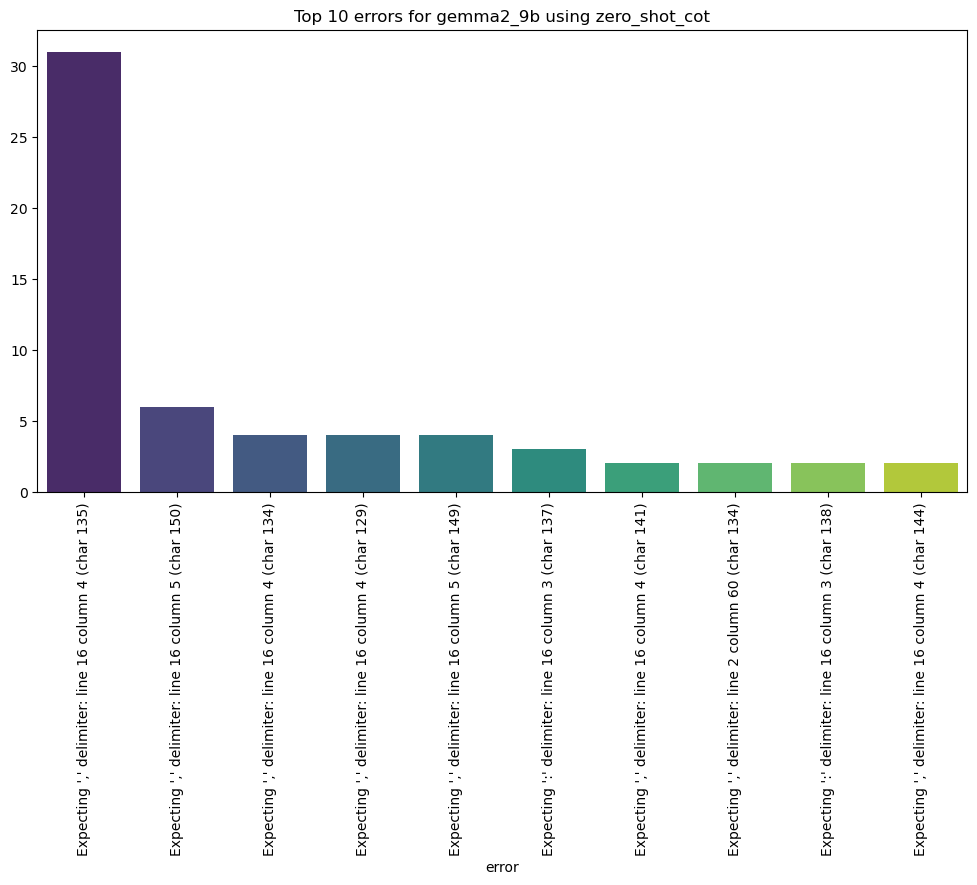

Total errors: 52


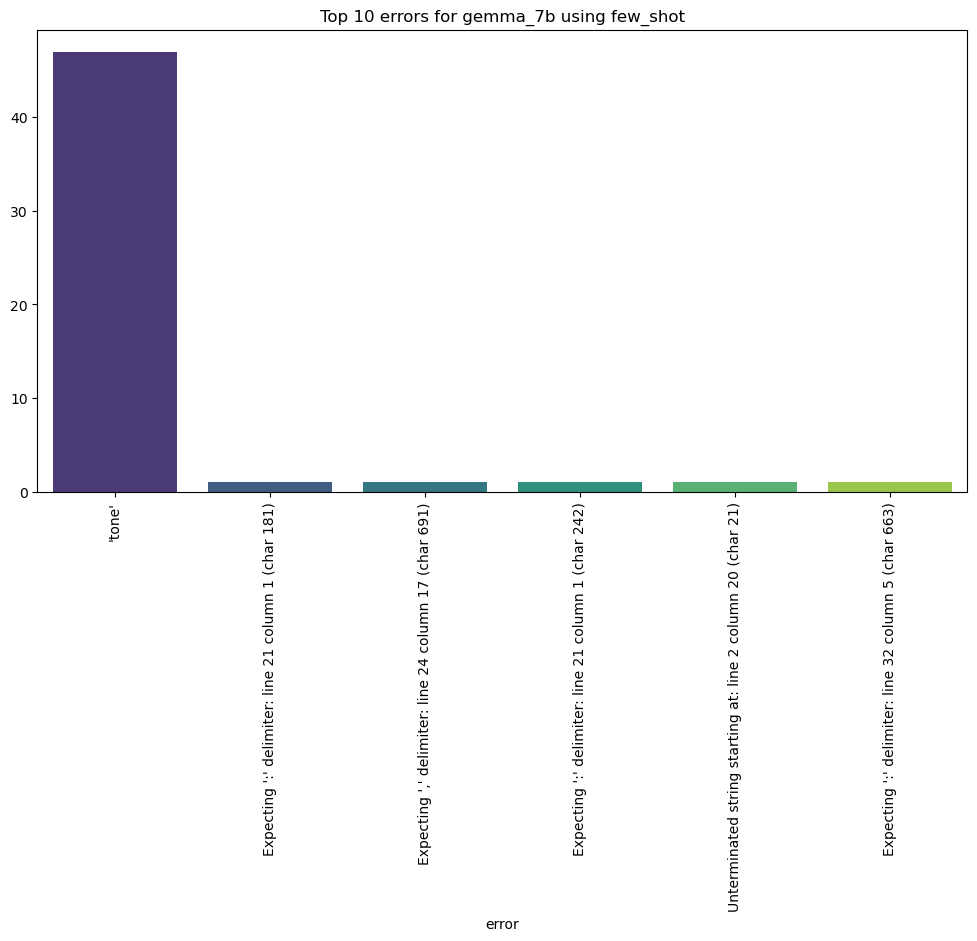

Total errors: 44


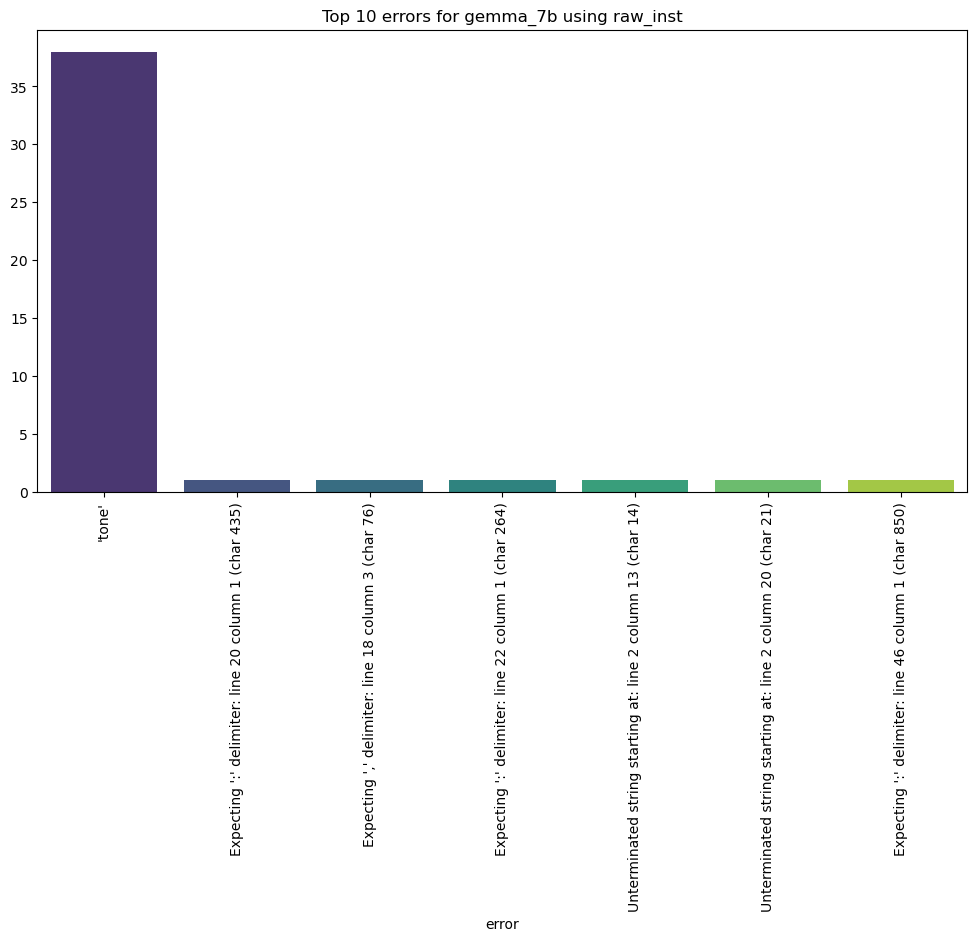

Total errors: 35


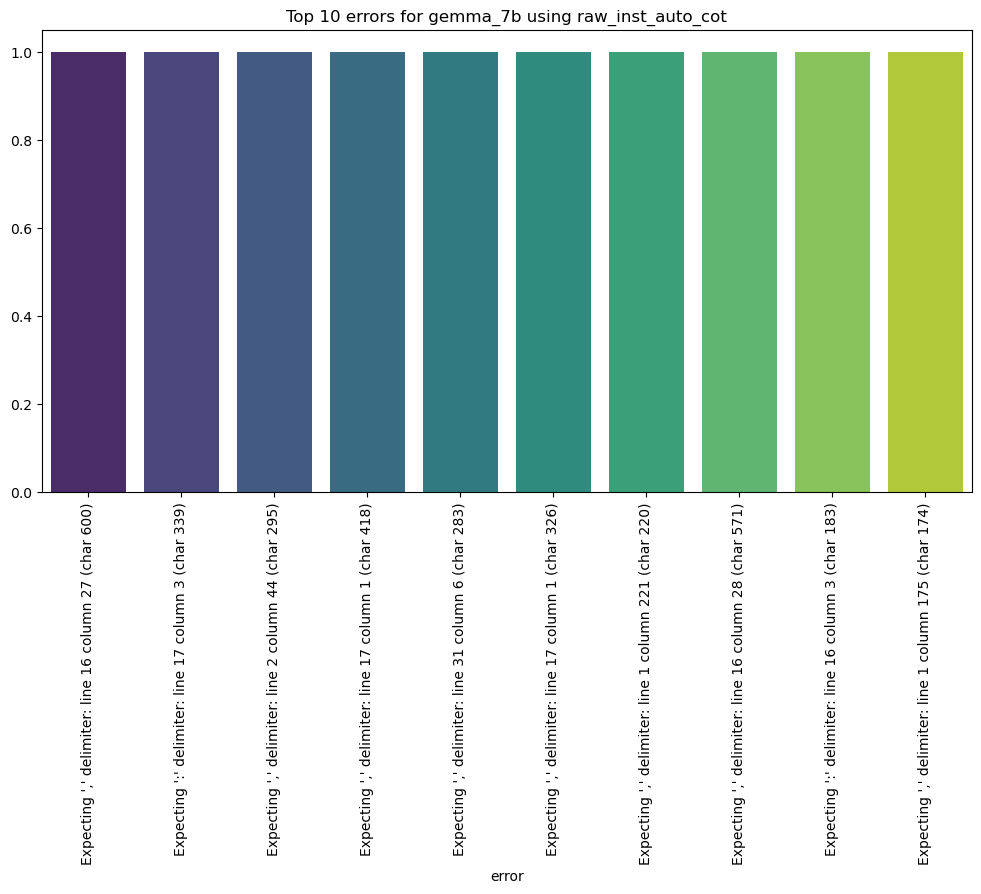

Total errors: 53


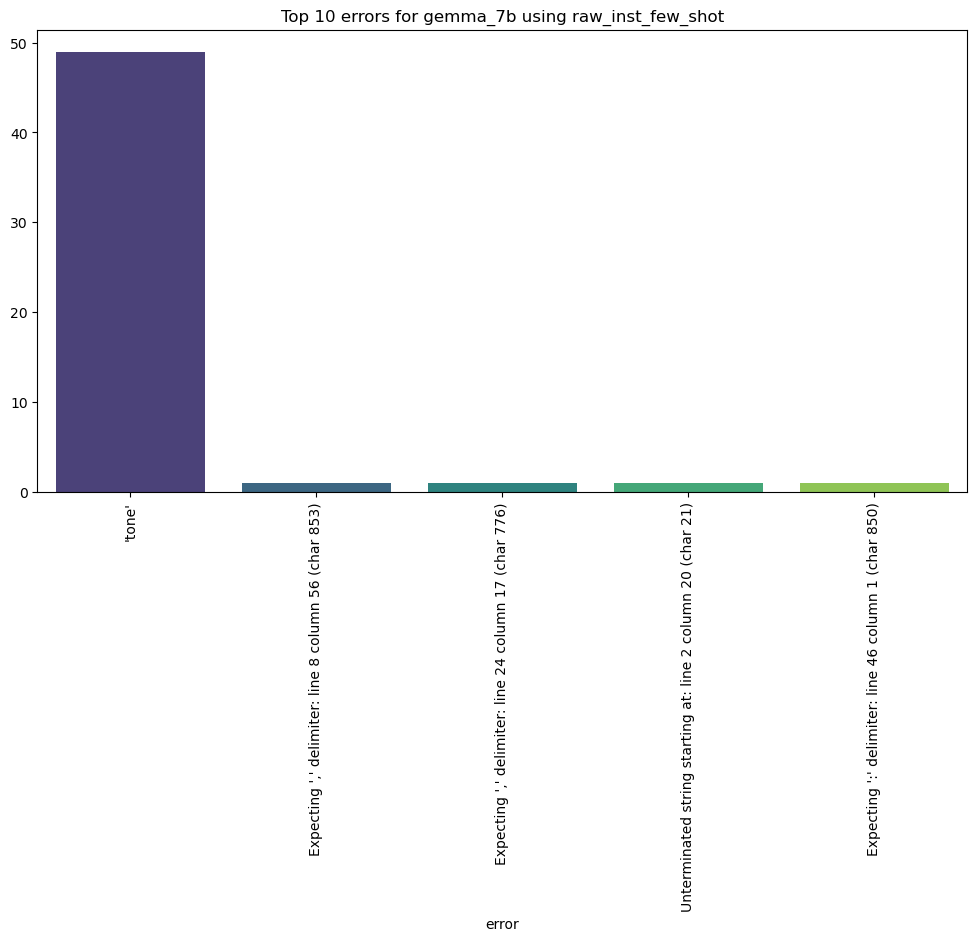

Total errors: 45


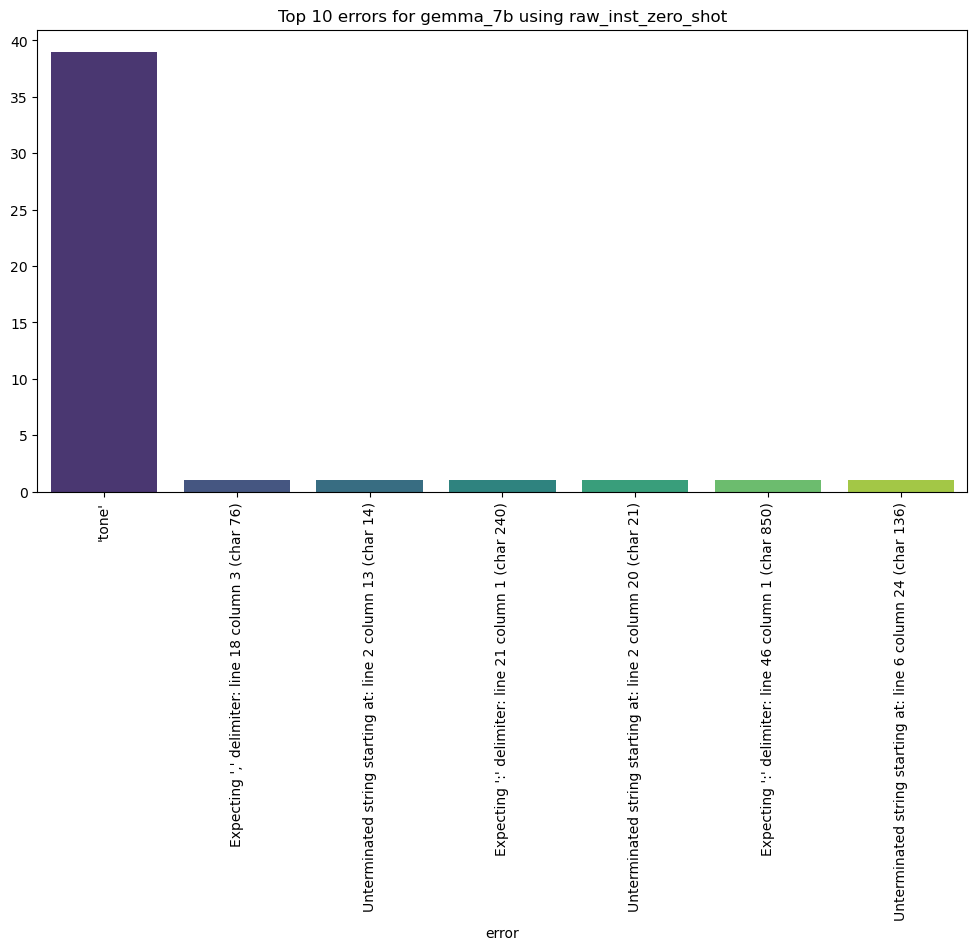

Total errors: 45


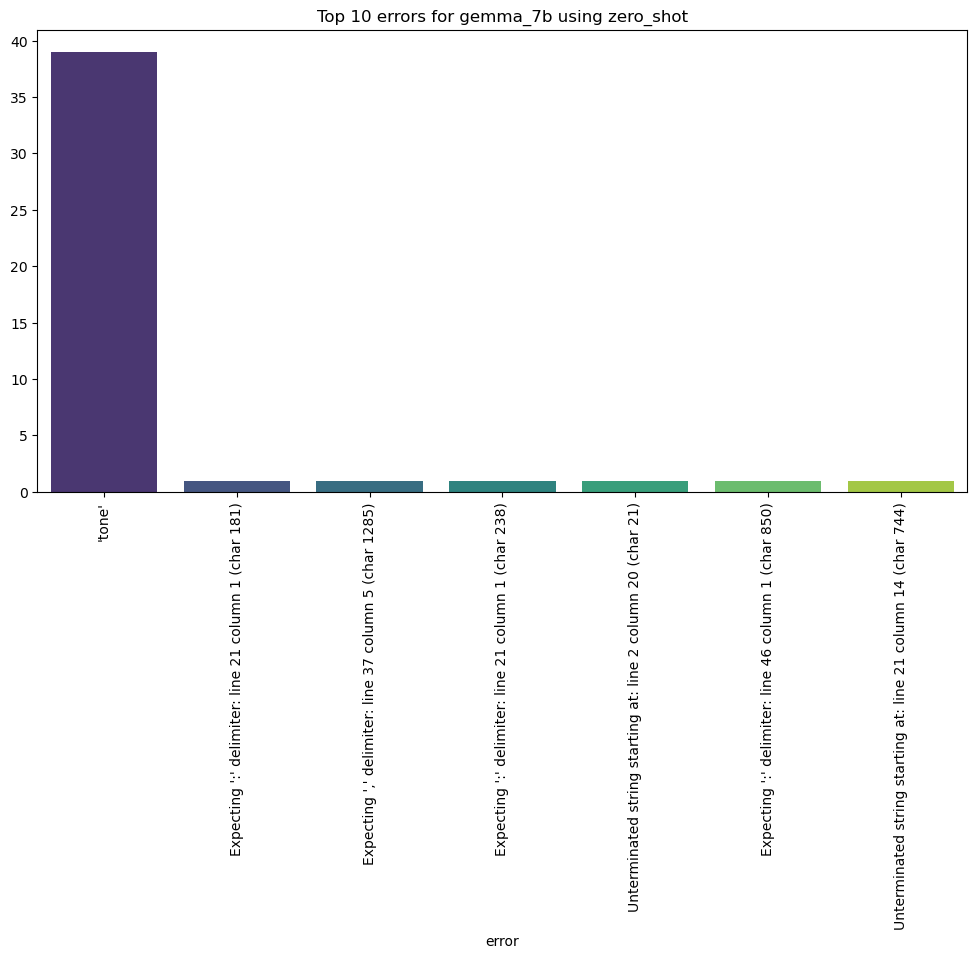

Total errors: 34


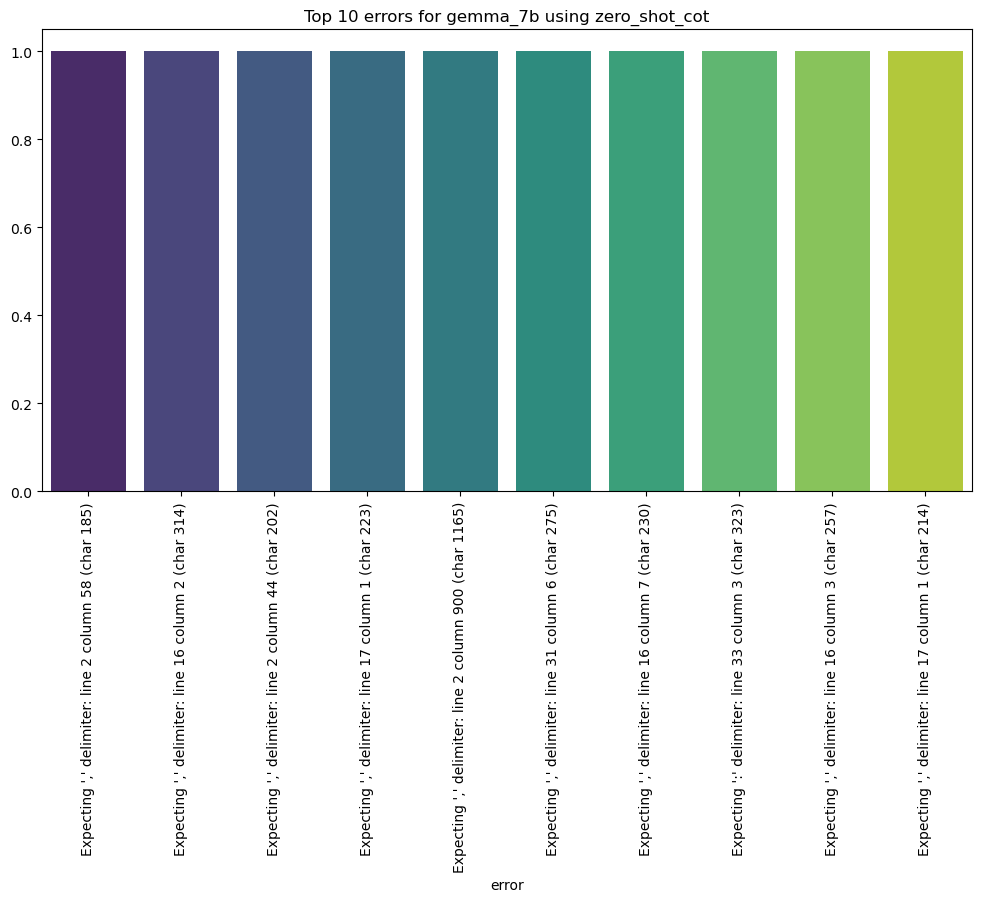

Total errors: 40


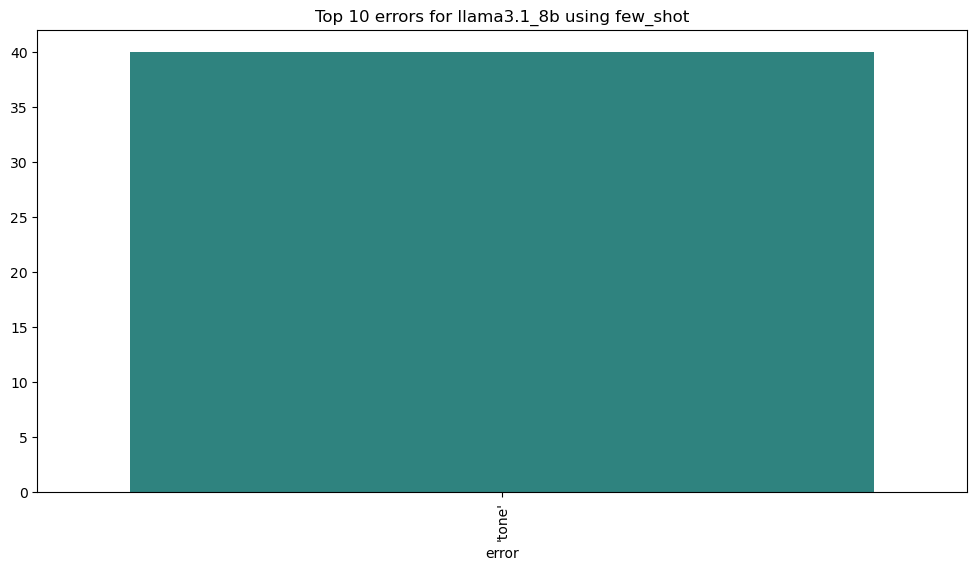

Total errors: 35


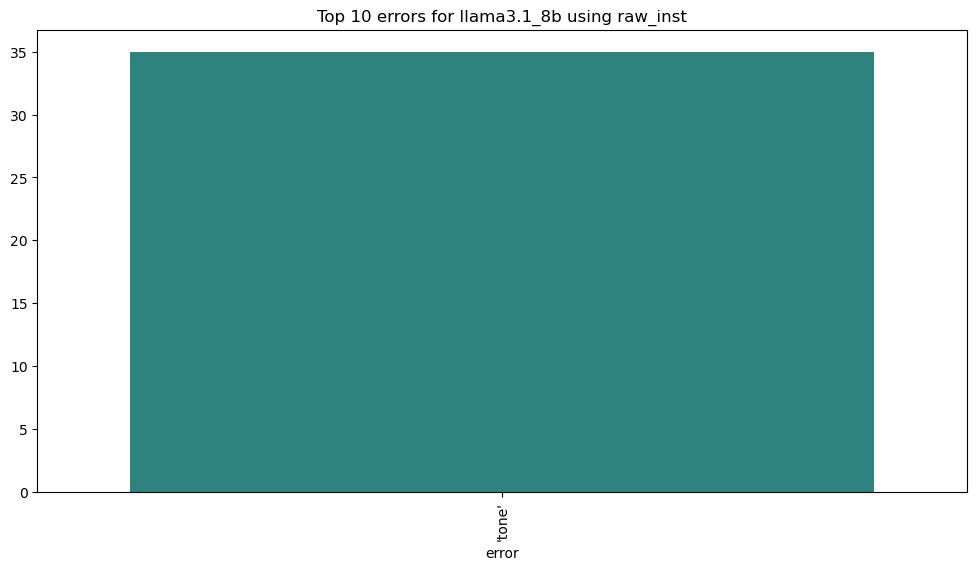

Total errors: 1


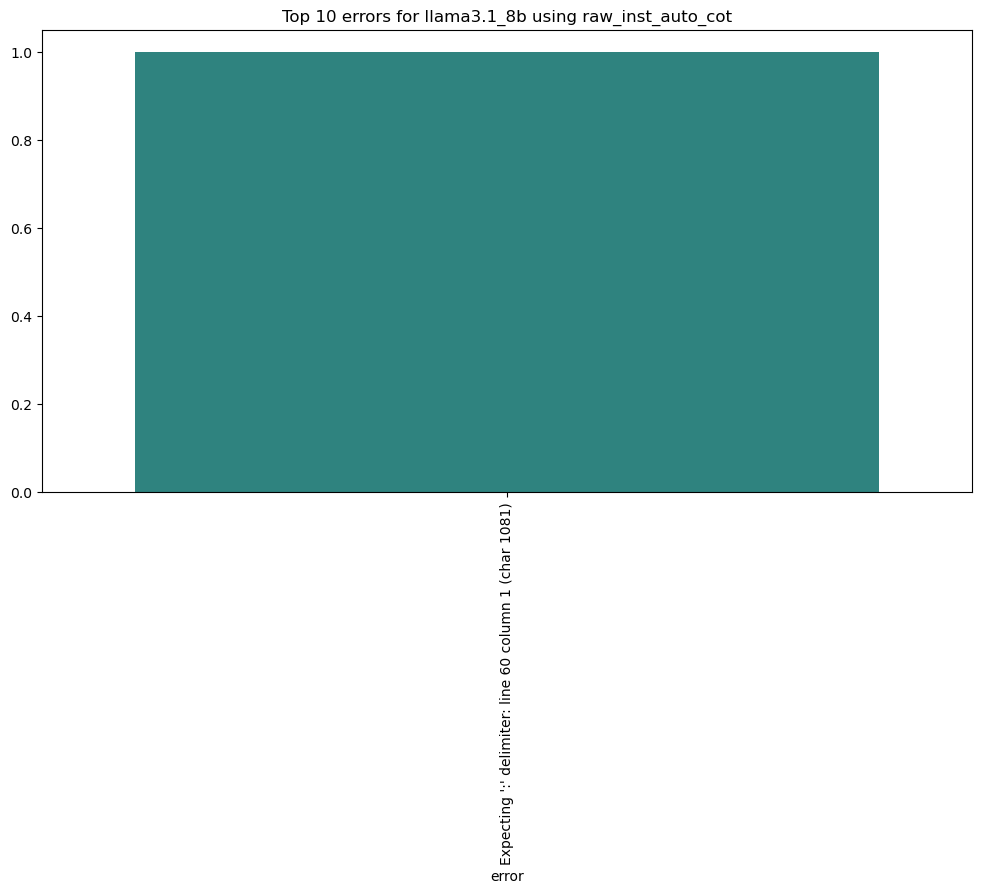

Total errors: 40


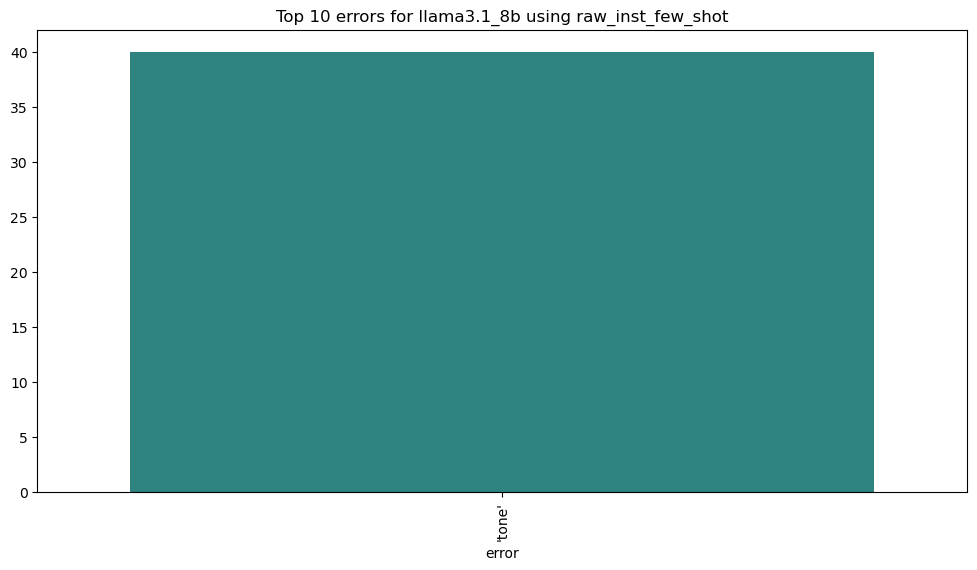

Total errors: 35


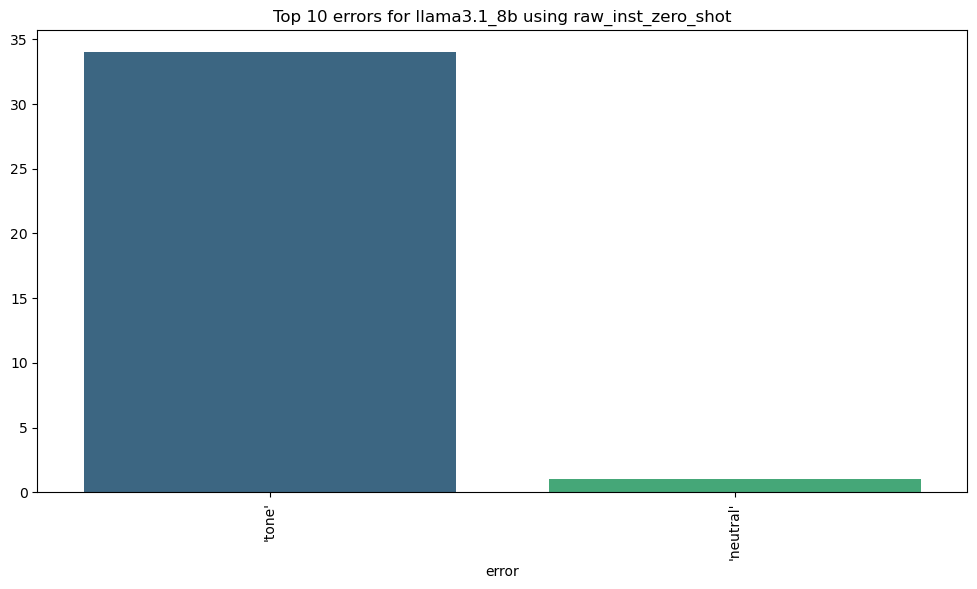

Total errors: 33


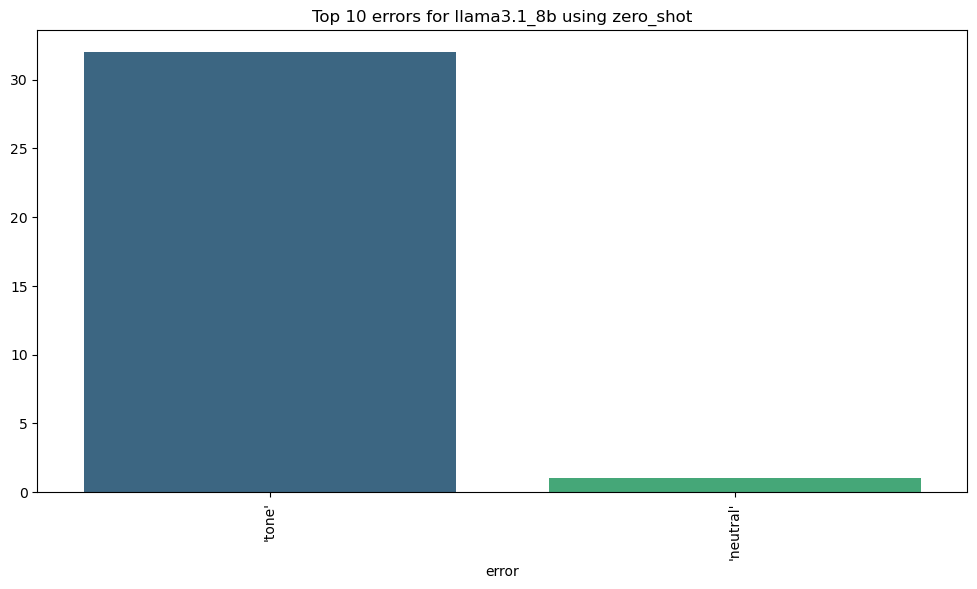

Total errors: 3


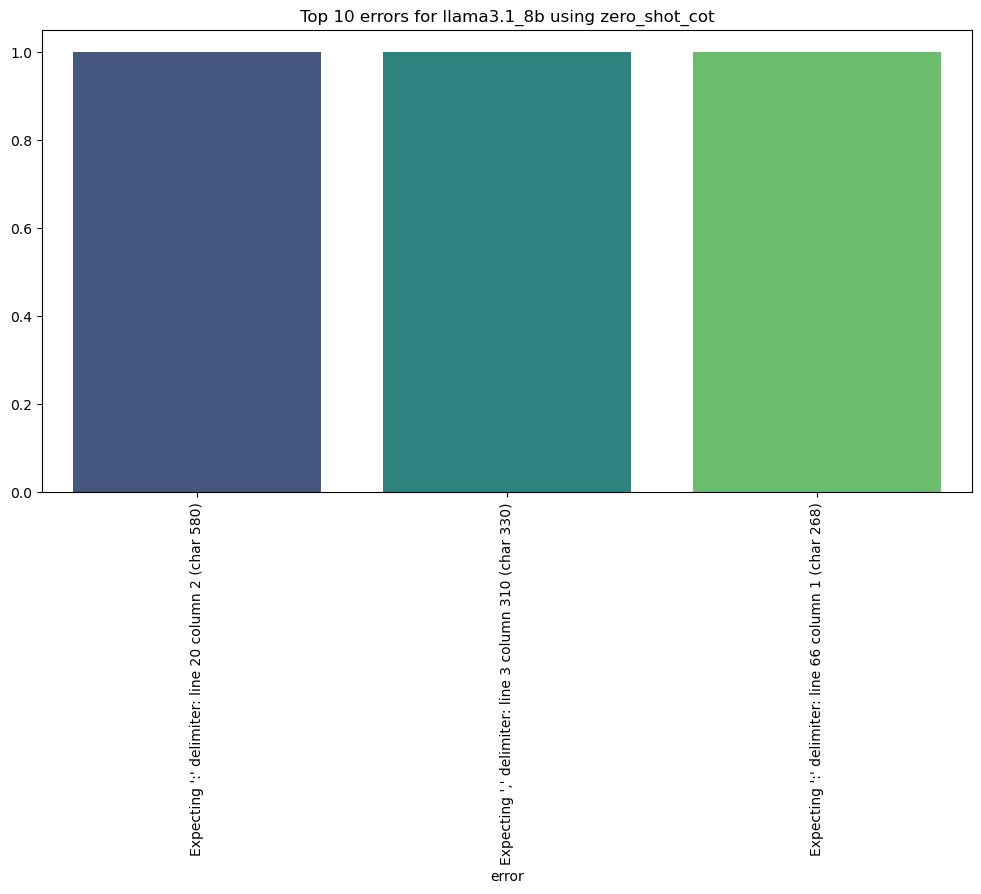

Total errors: 38


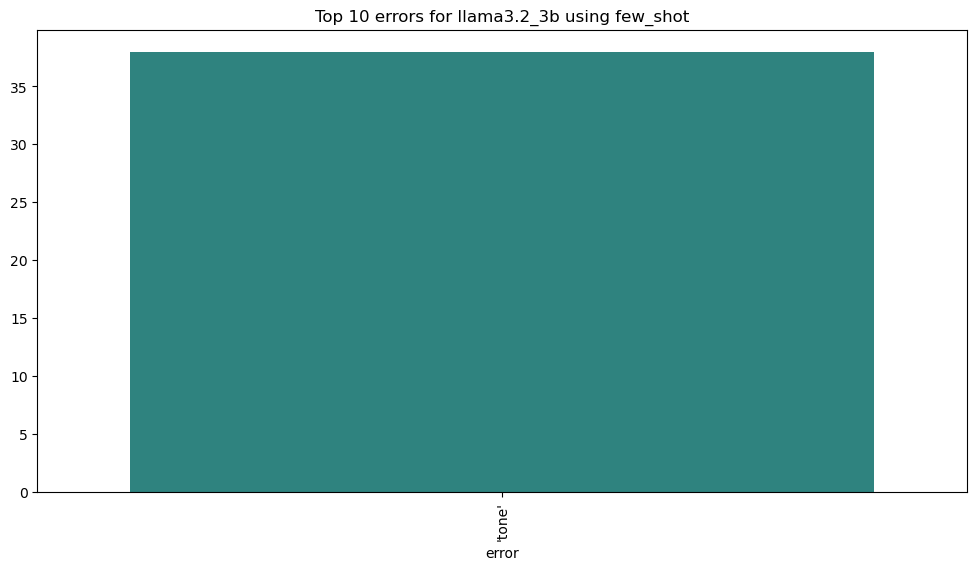

Total errors: 33


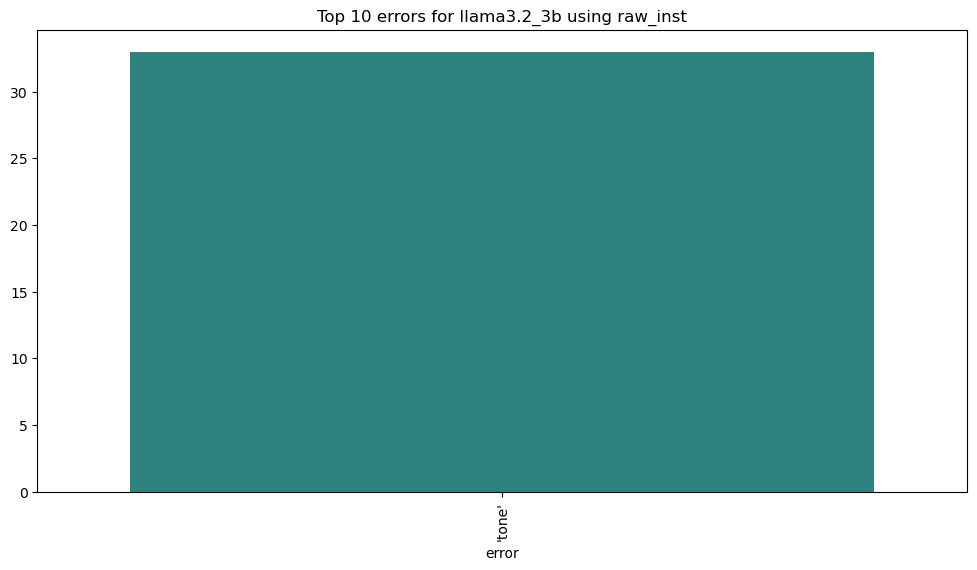

Total errors: 1


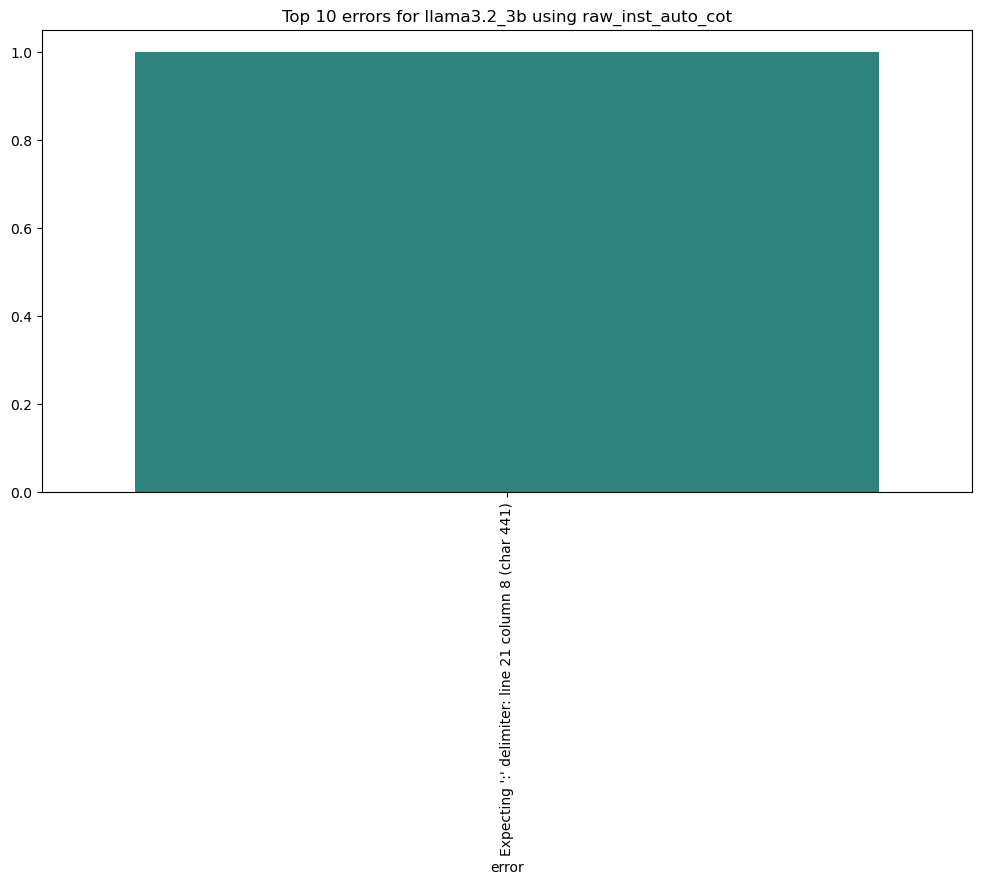

Total errors: 38


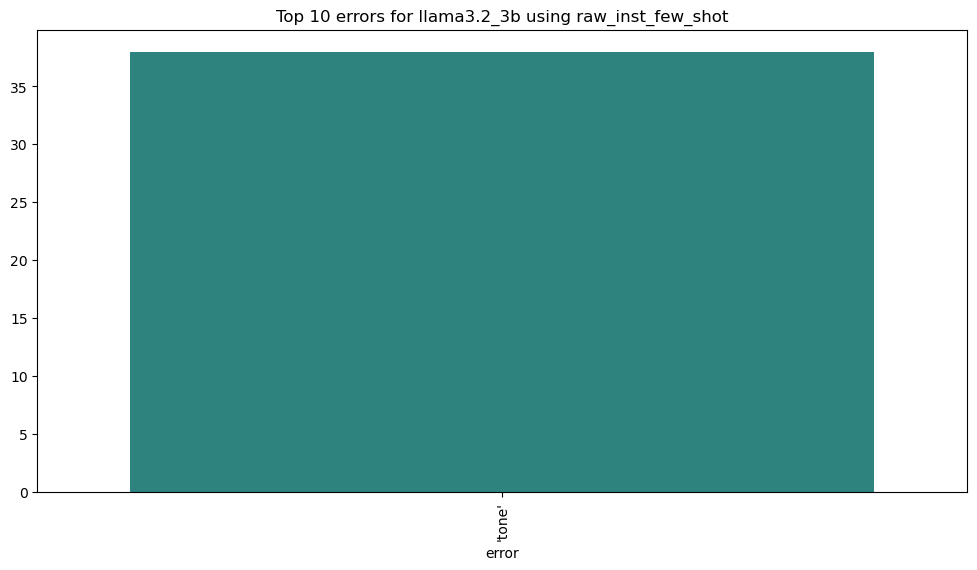

Total errors: 33


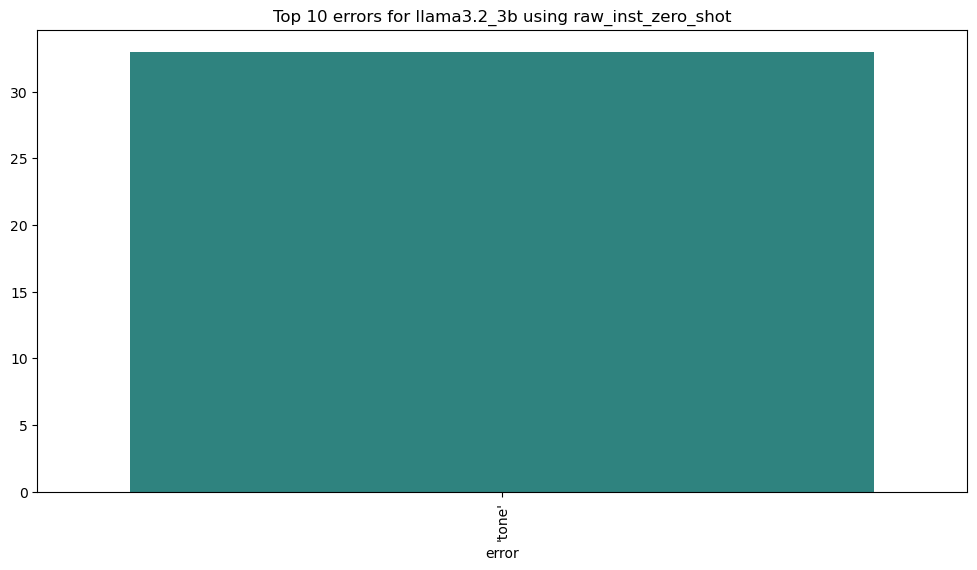

Total errors: 35


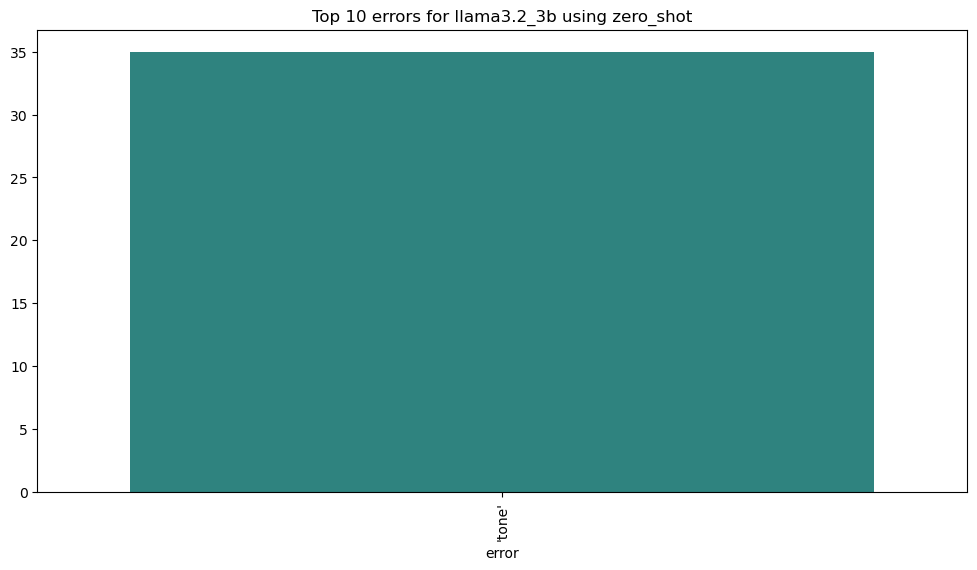

No errors found
Total errors: 52


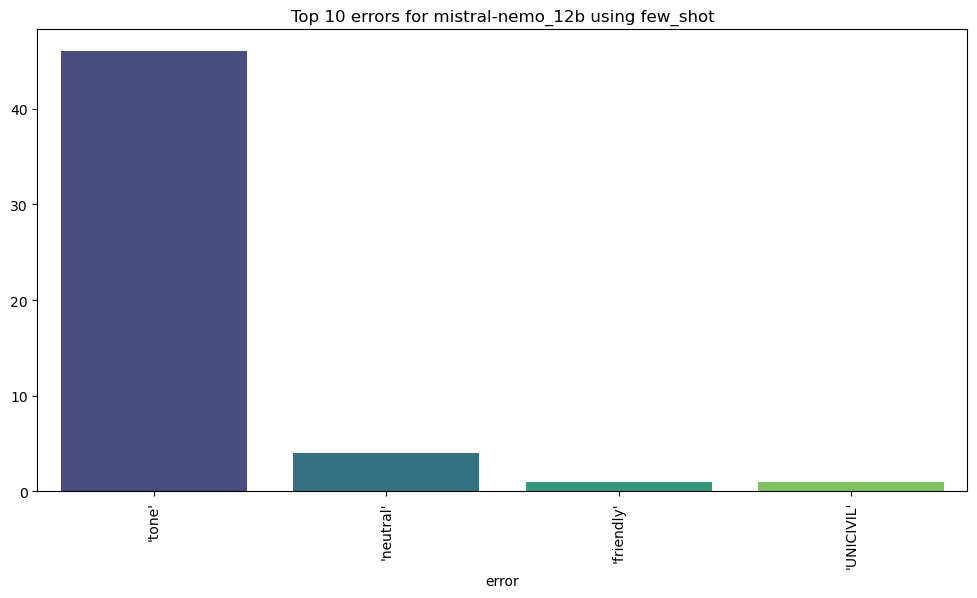

Total errors: 44


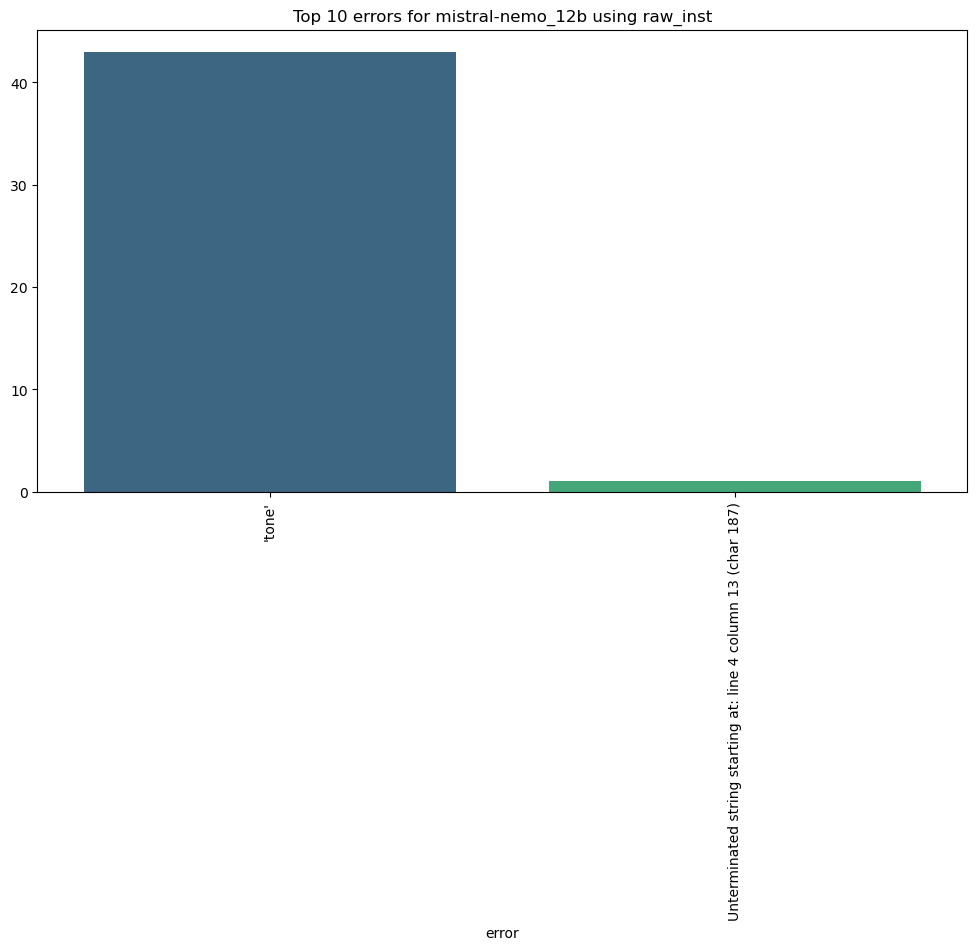

Total errors: 2


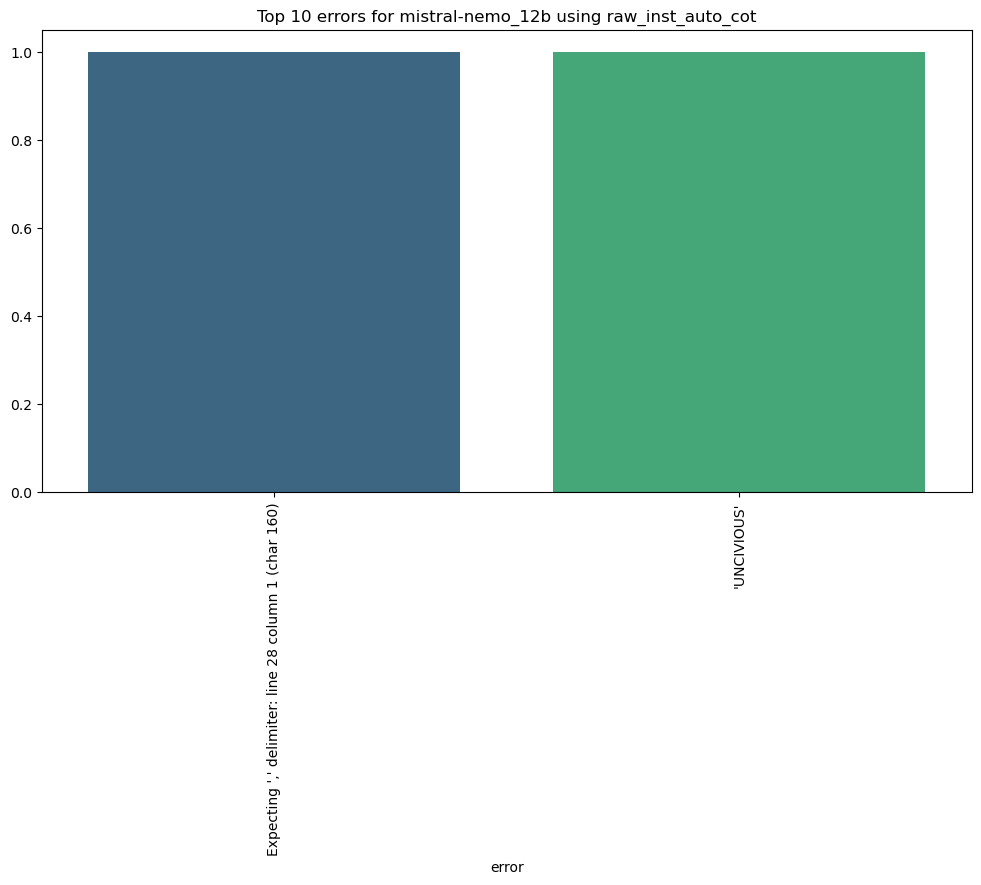

Total errors: 52


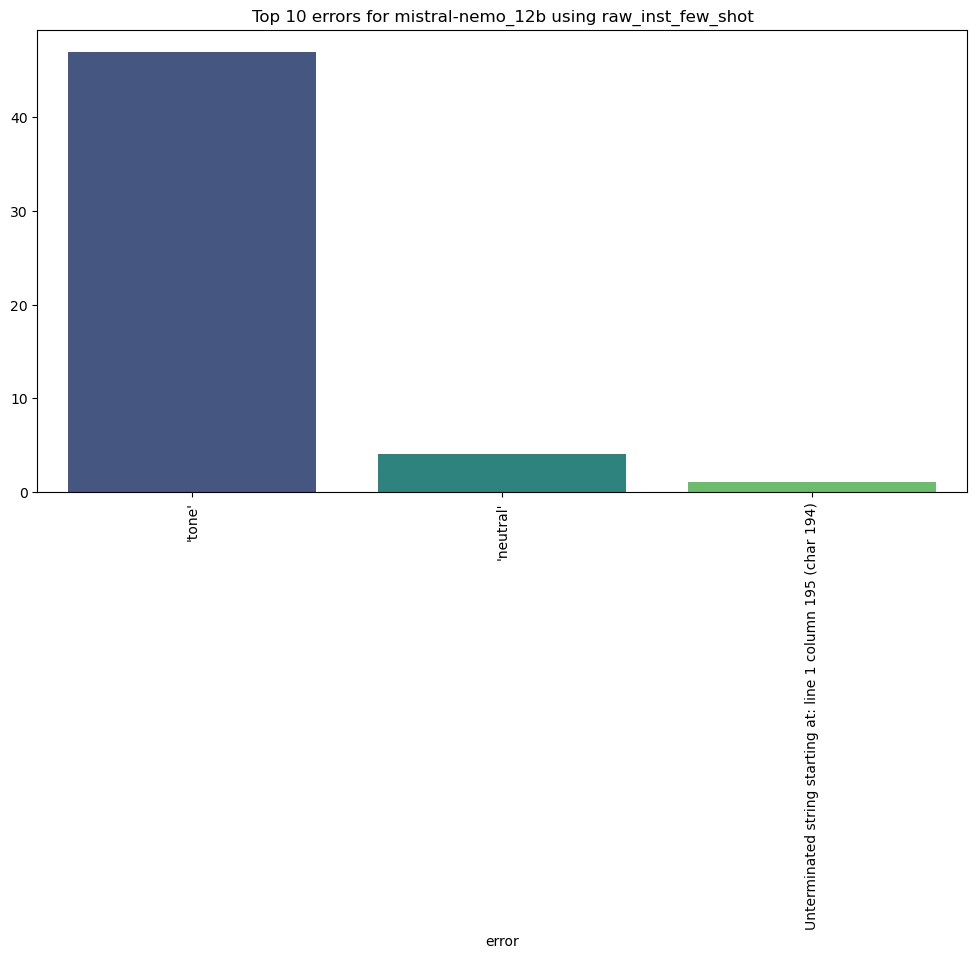

Total errors: 44


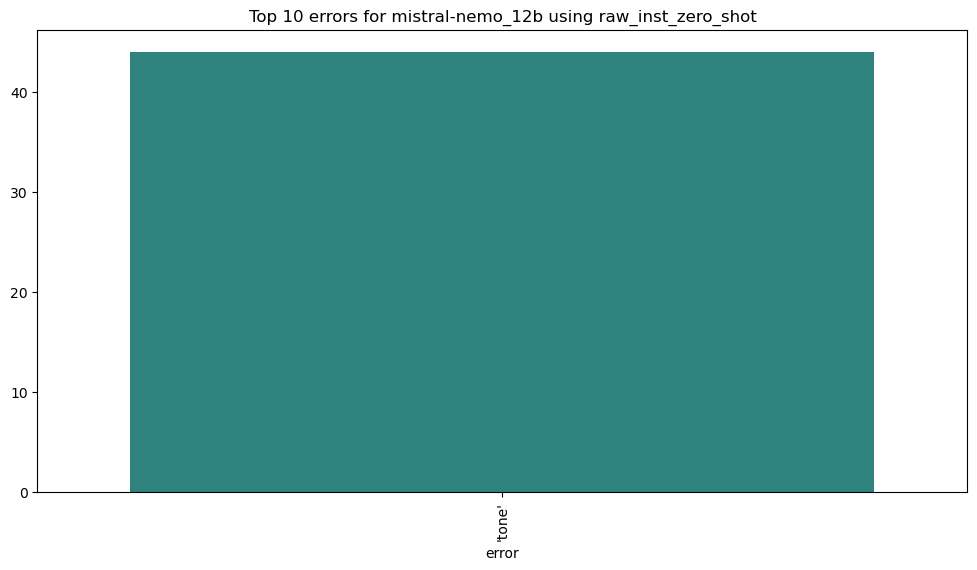

Total errors: 42


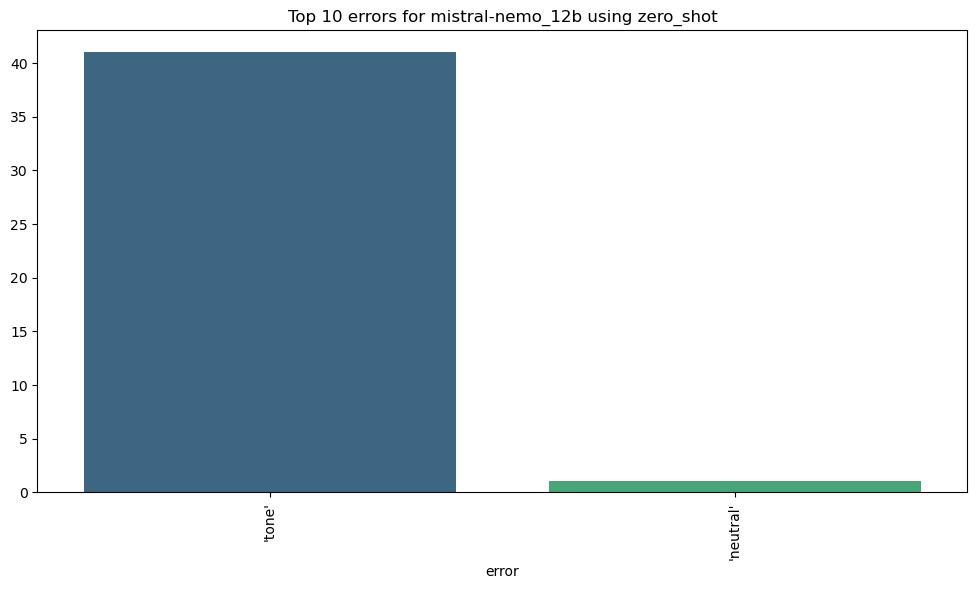

Total errors: 3


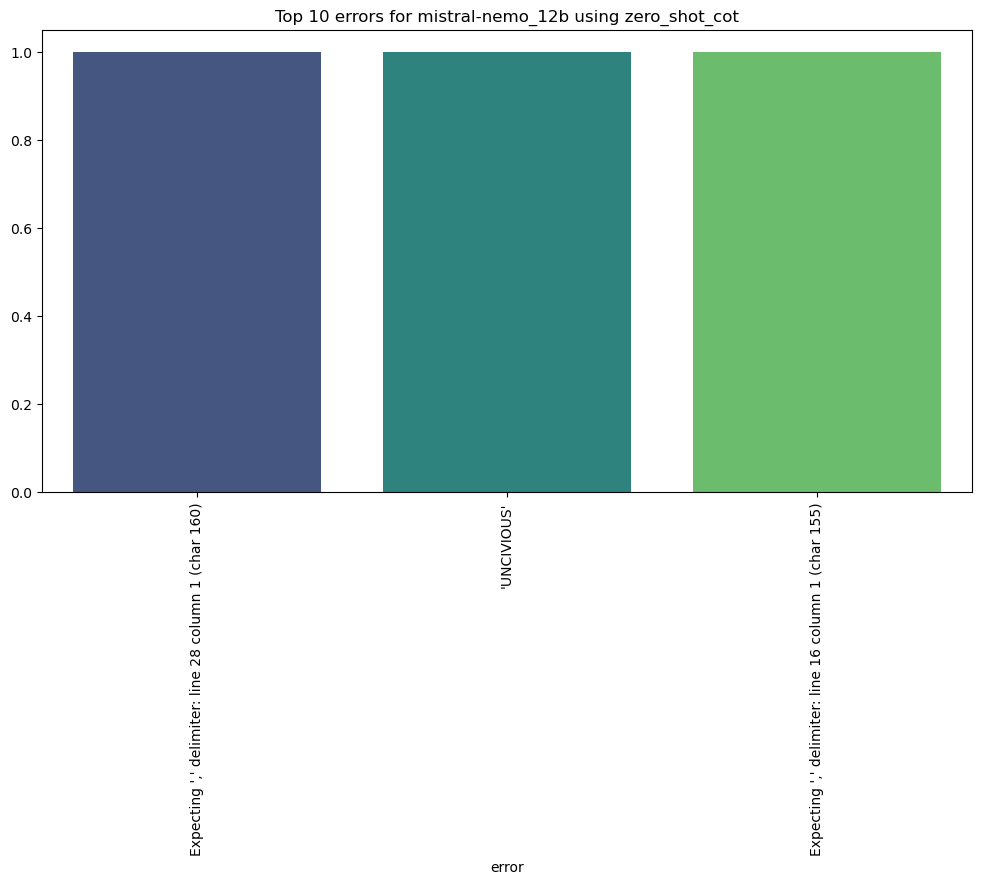

Total errors: 110


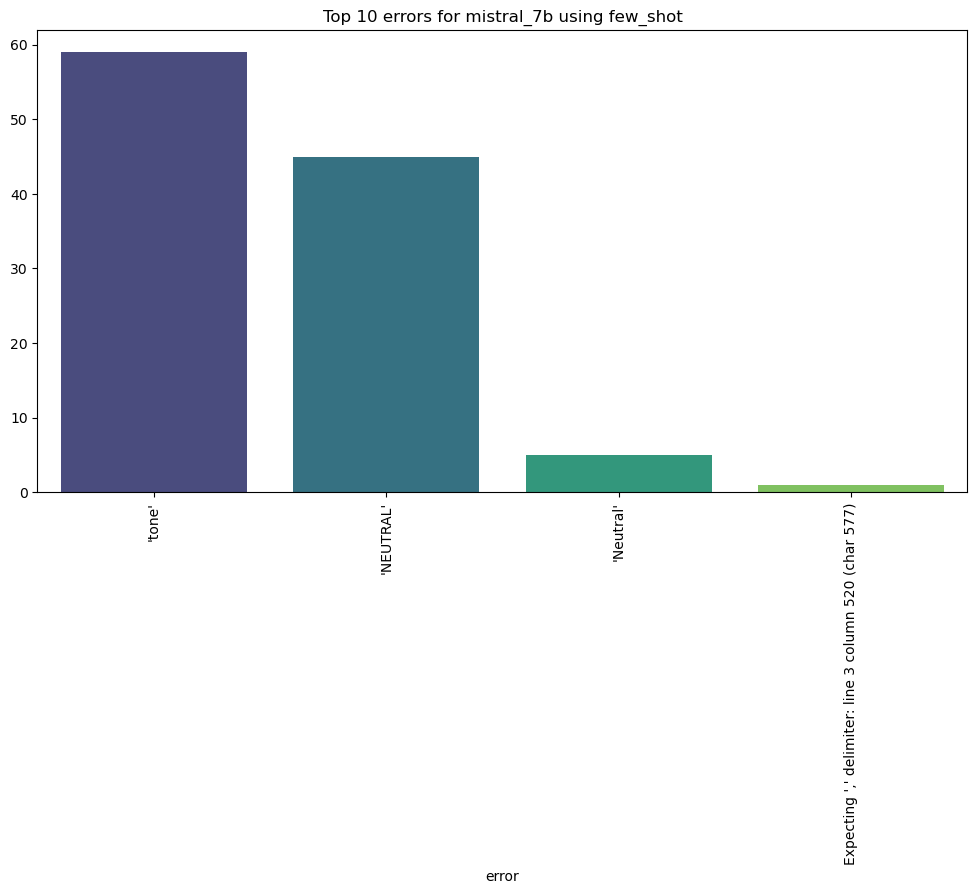

Total errors: 54


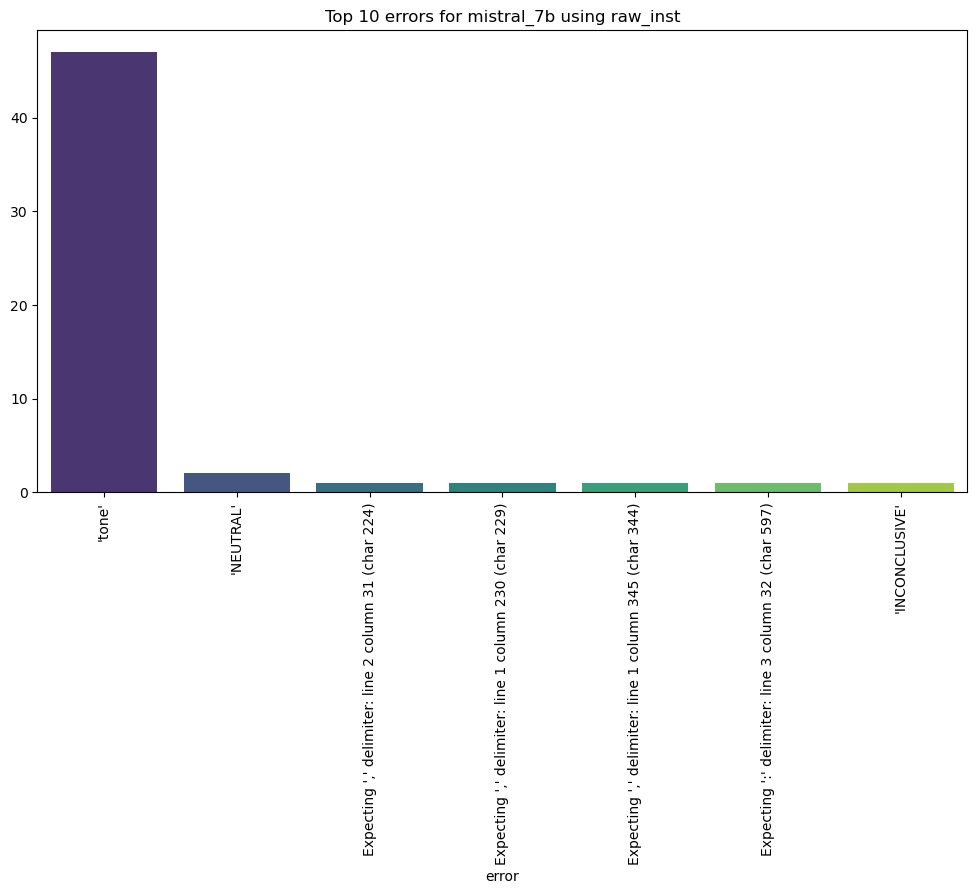

Total errors: 21


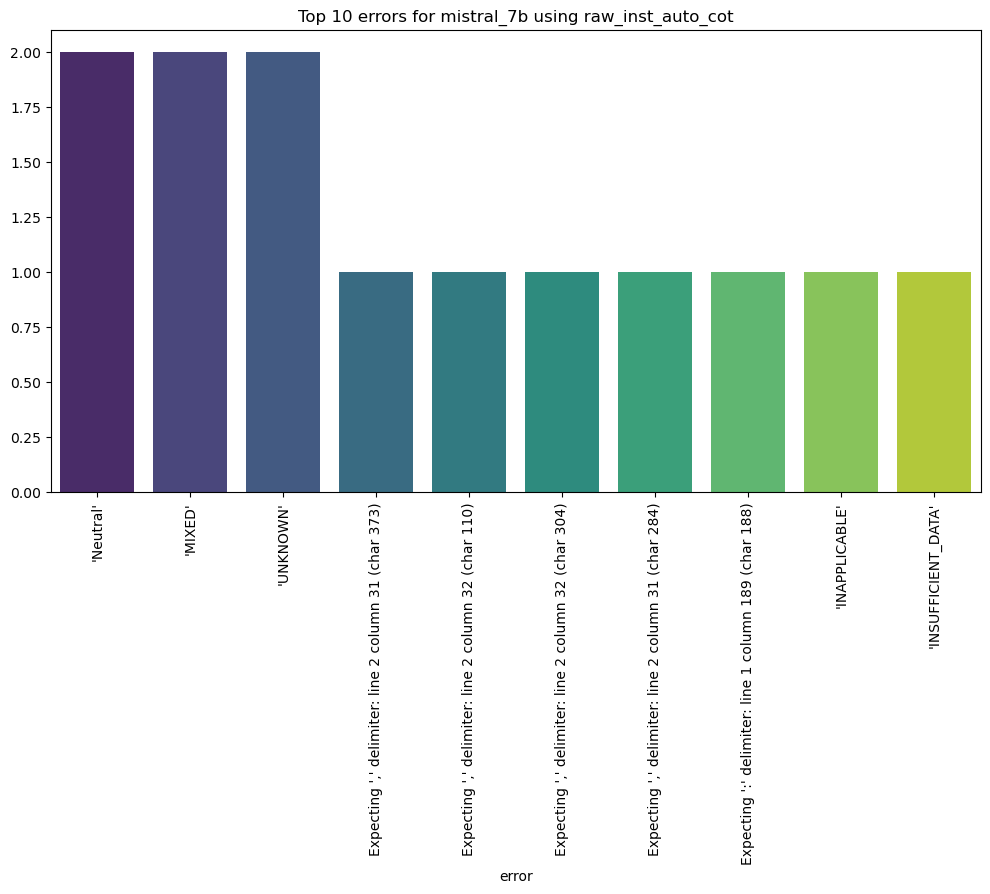

Total errors: 125


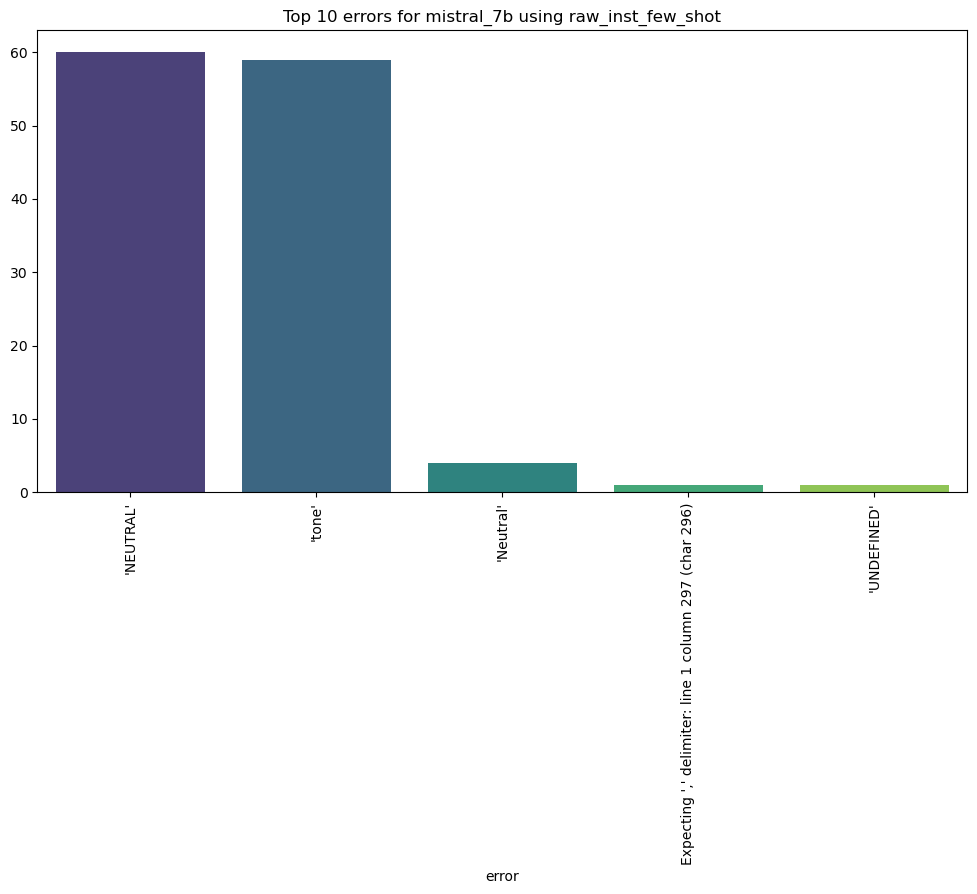

Total errors: 54


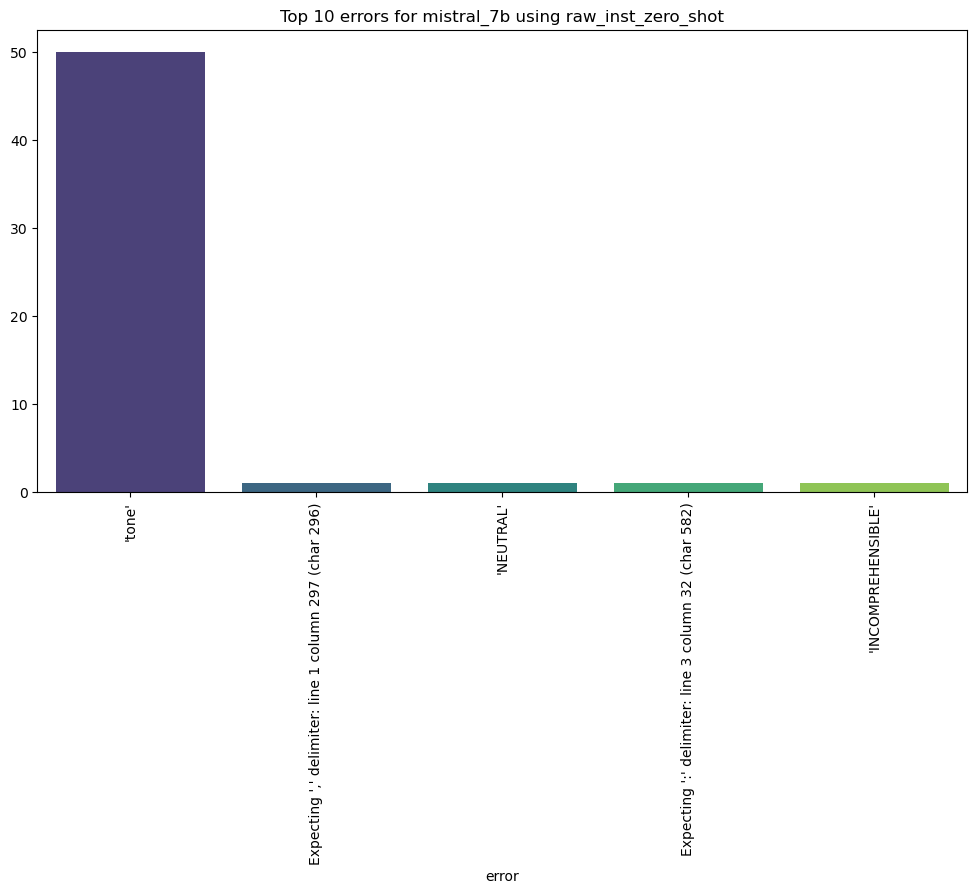

Total errors: 61


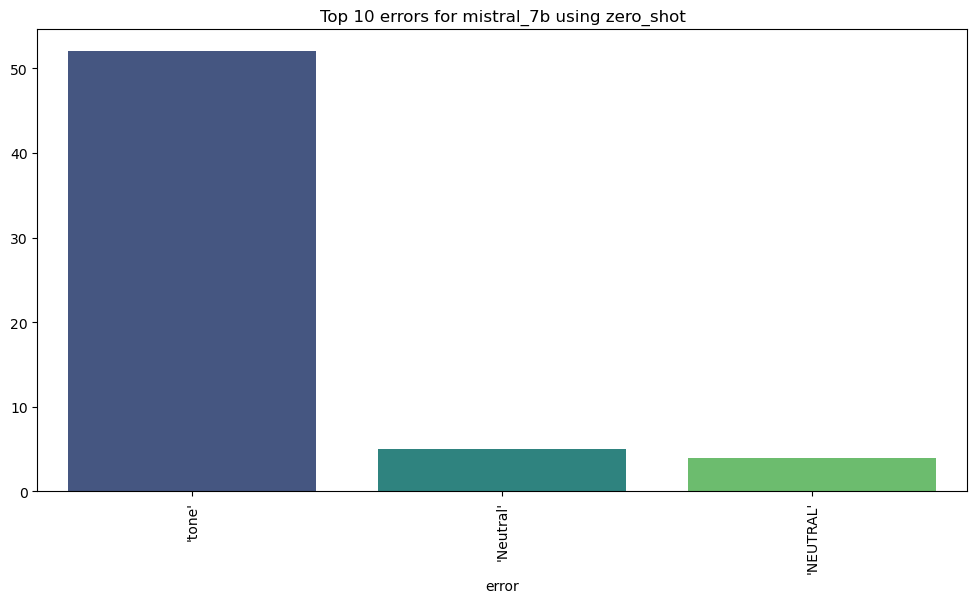

Total errors: 16


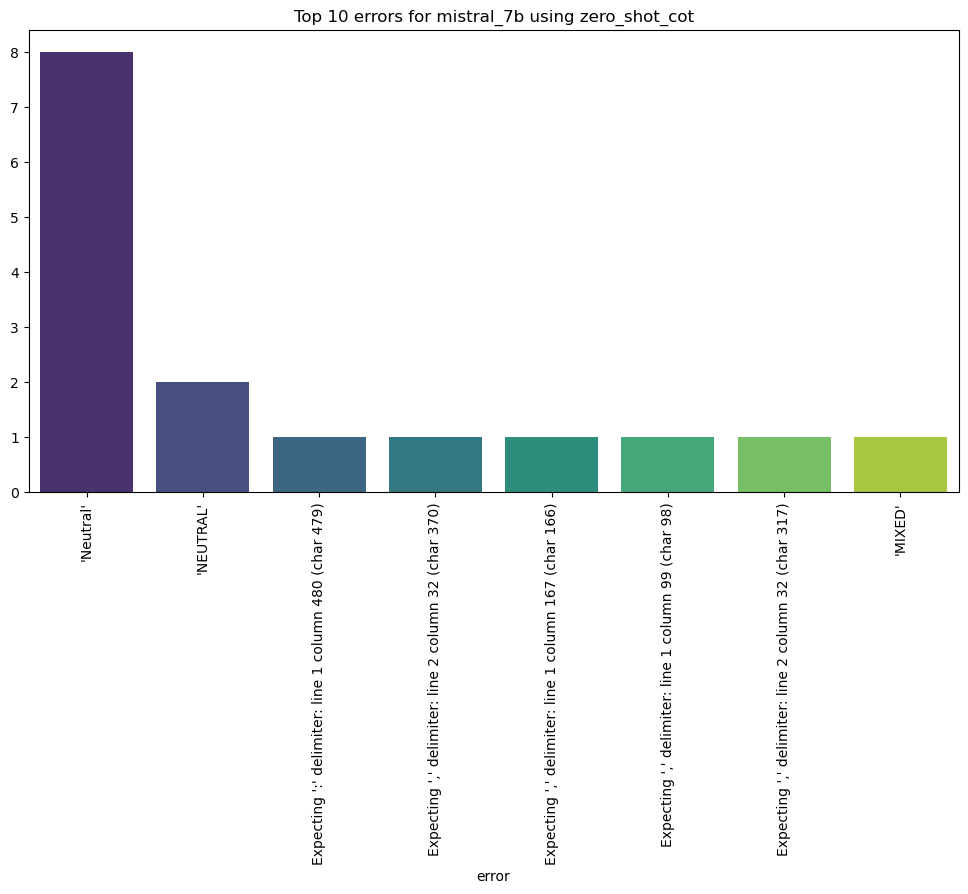

In [6]:
results_path = Path("results")
models_path = [path for path in results_path.iterdir() if path.is_dir() and path.name not in ["deepseek-r1_14b", 'refined_model', 'toxicr']]
df_count_errors = pd.DataFrame(columns=["model", "strategy", "total_errors"])
unique_index_error = []

for model in models_path:
    strategy_path = [path for path in model.iterdir() if path.is_dir()]
    for strategy in strategy_path:
        error_path = strategy / "errors.json"
        error_df = pd.read_json(error_path)
        # display(error_df.head())
        # break
        
        # coletando os indices em que ocorreram erros
        if len(error_df) != 0:
            error_df = error_df.loc[~error_df['index'].isin(duplicates.index.to_list())] # removendo os duplicados
            unique_index_error.extend(list(error_df.loc[:, 'index'].values)) # adicionando os indices dos erros
        count_errors = error_analysis(error_df, model.name, strategy.name)
        df_count_errors.loc[len(df_count_errors)] = [model.name, strategy.name, count_errors]

unique_index_error = list(set(unique_index_error)) # removendo os indices duplicados

In [7]:
len(unique_index_error)

922

In [8]:
df = pd.read_csv(r"C:\Users\mario\Documents\estudos\ufc\Granularidade Grossa\data\final_df_cleaned.csv")
len(df)

6879

In [9]:
len(unique_index_error) / len(df)

0.1340311091728449

In [10]:
df['actual'].value_counts()

actual
0    4943
1    1936
Name: count, dtype: int64

In [11]:
df['actual'].value_counts(normalize=True)

actual
0    0.718564
1    0.281436
Name: proportion, dtype: float64

In [13]:
df_count_errors['total_amostras'] = len(df)
df_count_errors['amostras_classificadas'] = df_count_errors['total_amostras'] - df_count_errors['total_errors']
df_count_errors['porcentagem_de_erros'] = df_count_errors['total_errors'] / df_count_errors['total_amostras']
df_count_errors

,model,strategy,total_errors,total_amostras,amostras_classificadas,porcentagem_de_erros
0,deepseek-llm_7b,few_shot,147,6879,6732,0.021369
1,deepseek-llm_7b,raw_inst,32,6879,6847,0.004652
2,deepseek-llm_7b,raw_inst_auto_cot,10,6879,6869,0.001454
3,deepseek-llm_7b,raw_inst_few_shot,37,6879,6842,0.005379
4,deepseek-llm_7b,raw_inst_zero_shot,23,6879,6856,0.003344
5,deepseek-llm_7b,zero_shot,344,6879,6535,0.050007
6,deepseek-llm_7b,zero_shot_cot,6,6879,6873,0.000872
7,gemma2_9b,few_shot,51,6879,6828,0.007414
8,gemma2_9b,raw_inst,43,6879,6836,0.006251
9,gemma2_9b,raw_inst_auto_cot,237,6879,6642,0.034453


In [8]:
import pandas as pd
df = pd.read_excel(r'C:\Users\mario\Documents\estudos\ufc\LLM-TESTS\granularidade_grossa\data\Manual_investigation_Final.xlsx')
df.head()

,Serial,message,actual,Mmodel,ToxiCR,GPT4,Politeness_standford,Politeness_PoliteBot,detoxification_classifier,file_name
0,16387,will i have all our IAP files in my game when ...,1,1,1,0,0,1,0,prediction_comments_libgdx.csv
1,7783,"argh, and thank you!\n",1,1,0,0,0,0,0,prediction_comments_processing.csv
2,10364,I feel this tuning is ugly...\nCould you show ...,1,1,1,0,0,1,0,prediction_comments_frameworkbenchmarks.csv
3,18894,"Anything ""new SQL stuff"" which contains named ...",0,0,0,0,0,1,0,prediction_comments_dbeaver.csv
4,40468,Oof.,1,1,1,0,0,0,0,prediction_comments_bazel.csv
